# Project Supervised Learning Foundations: Recell 

## Description

### Context

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

 

## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. The objective is to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

### Key Questions: 
1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

### Data Description
The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.

### Data Dictionary

* brand_name: Name of manufacturing brand
* os: OS on which the phone runs
* screen_size: Size of the screen in cm
* 4g: Whether 4G is available or not
* 5g: Whether 5G is available or not
* main_camera_mp: Resolution of the rear camera in megapixels
* selfie_camera_mp: Resolution of the front camera in megapixels
* int_memory: Amount of internal memory (ROM) in GB
* ram: Amount of RAM in GB
* battery: Energy capacity of the phone battery in mAh
* weight: Weight of the phone in grams
* release_year: Year when the phone model was released
* days_used: Number of days the used/refurbished phone has been used
* new_price: Price of a new phone of the same model in euros
* used_price: Price of the used/refurbished phone in euros

### Importing necessary libraries 

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

### Loading the dataset

In [2]:
# loading the dataset
data = pd.read_csv("used_phone_data_new.csv")

## Data Overview

### Make a copy of the dataset

In [3]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

### View the first few rows of the dataset

In [4]:
# let's view the first 5 entries of the data
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        23.97  yes   no            13.0   
1      Honor  Android        28.10  yes  yes            13.0   
2      Honor  Android        24.29  yes  yes            13.0   
3      Honor  Android        26.04  yes  yes            13.0   
4      Honor  Android        15.72  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price  used_price  
0        127     111.62       86.96  
1        325     249.39      161.49  
2        162     359.47      268.55  
3        345     278.93      180.23  
4        293     140.87      103.80

#### Observations:

The DataFrame has 15 columns as mentioned in the Data Dictionary. Data in each row corresponds to the different attributes of used/refurbished phones.

### View a random sample of the dataset

In [5]:
# let's view a random sample of the data
df.sample(n=10, random_state=1)

brand_name       os  screen_size   4g  5g  main_camera_mp  \
2501    Samsung  Android        13.49  yes  no            13.0   
2782       Sony  Android        13.81  yes  no             NaN   
605      Others  Android        12.70  yes  no             8.0   
2923       Vivo  Android        19.37  yes  no            13.0   
941      Others   Others         5.72   no  no             0.3   
1833         LG  Android        13.49   no  no             8.0   
671       Apple      iOS        14.92  yes  no            12.0   
1796         LG  Android        17.78  yes  no             5.0   
757        Asus  Android        13.49  yes  no            13.0   
3528     Realme  Android        15.72  yes  no             NaN   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
2501              13.0        32.0  4.00   3600.0   181.0          2017   
2782               8.0        32.0  4.00   3300.0   156.0          2019   
605                5.0        16.0  4.00   2400.0   137.0          2015   
2923              16.0        64.0  4.00   3260.0   149.3          2019   
941                0.3        32.0  0.25    820.0    90.0          2013   
1833               1.3        32.0  4.00   3140.0   161.0          2013   
671                7.0        64.0  4.00   5493.0    48.0          2018   
1796               0.3        16.0  4.00   4000.0   294.8          2014   
757                8.0        32.0  4.00   5000.0   181.0          2017   
3528              16.0        64.0  4.00   4035.0   184.0          2019   

      days_used  new_price  used_price  
2501        683    198.680       79.47  
2782        195    198.150      149.10  
605        1048    161.470       48.39  
2923        375    211.880      138.31  
941         883     29.810        8.92  
1833        670    240.540       96.18  
671         403    700.150      350.08  
1796        708    189.300       75.94  
757         612    270.500      108.13  
3528        433    159.885       80.00

#### Observations:
* From the 10 random rows, we can see that the data contains missing values which needs to be treated.

### Check the shape of the dataset

In [6]:
# check number of rows and columns
df.shape

(3571, 15)

#### Observations:
* The dataset has 3571 rows and 15 columns. 

### Check the column names

In [7]:
# take a look at the column names
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

#### Observations:
* As mentioned in the data dictionary, there are 15 columns.
* The column names have no spaces and special characters in them. So we don't need to fix the names.

### Get the info regarding column datatypes

In [8]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


#### Observations:
* There are 3571 entries and 15 columns.
* Out of 15 variables, 4 variables are of the type object and will be converted to categorical variables.
* The columns main_camera_mp,selfie_camera_mp, int_memory, ram, battery and weight contains missing values which needs to be treated.
* Dependent variable is used_price
* Total memory usage is 418.6+ KB


### Fixing the datatypes

In [9]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# converting 'brand_name', 'os', '4g' and '5g' into categorical data

df.brand_name = df.brand_name.astype('category')     # Convert brand_name from object to category
df.os = df.os.astype('category')           # Convert os from object to category
df['4g'] = df['4g'].astype('category')     # Convert 4g from object to category
df['5g'] = df['5g'].astype('category')     # Convert 5g from object to category

# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


#### Observations:
* The variables 'brand_name', 'os', '4g' and '5g' are converted to category.
* The total memory usage is now reduced to 322.7 KB.

### Count of variable data types

In [10]:
# Checking the count of different data types
df.dtypes.value_counts()

float64     9
int64       2
category    2
category    1
category    1
dtype: int64

#### Observations:
* There are 9 variables of type float, 4 variables of type category and 2 variables of type integer.

### Checking for number of unique values

In [11]:
# Checking the number of unique values in each variable
df.nunique()

brand_name            34
os                     4
screen_size          127
4g                     2
5g                     2
main_camera_mp        44
selfie_camera_mp      37
int_memory            16
ram                   14
battery              354
weight               613
release_year           8
days_used            930
new_price           3099
used_price          3044
dtype: int64

#### Observations:
* The data is about cell phones from 34 different brands and 4 operating systems.
* The variables 4g and 5g are binary.

### Get the Statistical Summary of the dataset

In [12]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

count unique      top  freq         mean          std  \
brand_name          3571     34   Others   509          NaN          NaN   
os                  3571      4  Android  3246          NaN          NaN   
screen_size       3571.0    NaN      NaN   NaN    14.803892     5.153092   
4g                  3571      2      yes  2359          NaN          NaN   
5g                  3571      2       no  3419          NaN          NaN   
main_camera_mp    3391.0    NaN      NaN   NaN     9.400454     4.818396   
selfie_camera_mp  3569.0    NaN      NaN   NaN     6.547352     6.879359   
int_memory        3561.0    NaN      NaN   NaN    54.532607    84.696246   
ram               3561.0    NaN      NaN   NaN     4.056962     1.391844   
battery           3565.0    NaN      NaN   NaN  3067.225666  1364.206665   
weight            3564.0    NaN      NaN   NaN   179.424285    90.280856   
release_year      3571.0    NaN      NaN   NaN  2015.964996     2.291784   
days_used         3571.0    NaN      NaN   NaN   675.391487   248.640972   
new_price         3571.0    NaN      NaN   NaN   237.389037   197.545581   
used_price        3571.0    NaN      NaN   NaN   109.880277   121.501226   

                     min     25%     50%      75%      max  
brand_name           NaN     NaN     NaN      NaN      NaN  
os                   NaN     NaN     NaN      NaN      NaN  
screen_size          2.7    12.7   13.49    16.51    46.36  
4g                   NaN     NaN     NaN      NaN      NaN  
5g                   NaN     NaN     NaN      NaN      NaN  
main_camera_mp      0.08     5.0     8.0     13.0     48.0  
selfie_camera_mp     0.3     2.0     5.0      8.0     32.0  
int_memory         0.005    16.0    32.0     64.0   1024.0  
ram                 0.03     4.0     4.0      4.0     16.0  
battery             80.0  2100.0  3000.0   4000.0  12000.0  
weight              23.0   140.0   159.0    184.0    950.0  
release_year      2013.0  2014.0  2016.0   2018.0   2020.0  
days_used           91.0   536.0   690.0    872.0   1094.0  
new_price           9.13  120.13   189.8  291.935   2560.2  
used_price          2.51  45.205   75.53    126.0  1916.54

**Observations**

* There are 34 different mobile brands of 4 different types of OS in the data.
* The release year of the phones ranges from 2013 to 2020.
* The screen size varies from 2.7 to 46.36 cm.
* The number of days used ranges from 91 to 1094.
* The Price of a new phone of the same model vary from 9.13 to 2560 euros.
* The Price of the used/refurbished phone vary from 2.51 to 1916 euros with an average ~110 euros.

## Exploratory Data Analysis (EDA)

**Before we further process the data, let's take a look at the graphical visualization of the data to understand it in a better way.**

### Function to plot a boxplot and a histogram along the same scale.

In [13]:

def histogram_boxplot(data, feature, title, xlabel, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    ).set(title=title, xlabel=xlabel)  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    ).set(xlabel=xlabel)  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Function to create labeled barplots

In [14]:


def labeled_barplot(data, feature, title, xlabel, ylabel, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("scrn_size.jpg", bbox_inches='tight')
    plt.show()  # show the plot

## Univariate Analysis

### Let's explore the manufacturing brand names

In [15]:
# check unique brand_name
df['brand_name'].value_counts().shape

(34,)

#### Observations:
* There are 34 unique brand names.

In [16]:
# check unique brand names
df['brand_name'].value_counts()

Others        509
Samsung       364
Huawei        264
LG            212
Lenovo        172
ZTE           141
Xiaomi        134
Oppo          129
Asus          126
Alcatel       125
Nokia         121
Micromax      120
Honor         118
Vivo          117
HTC           110
Motorola      110
Sony           88
Meizu          62
Apple          59
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Celkon         37
Lava           36
Karbonn        30
Spice          30
Microsoft      22
OnePlus        22
Coolpad        22
BlackBerry     22
Google         15
Infinix        10
Name: brand_name, dtype: int64

#### Observations:
* Out of the 34 manufacturing brands available, Infinix is the least represented brand.
* When considering the known brands, majority of the cell phones in the dataset is of the brand Samsung.

#### Graphical visualization

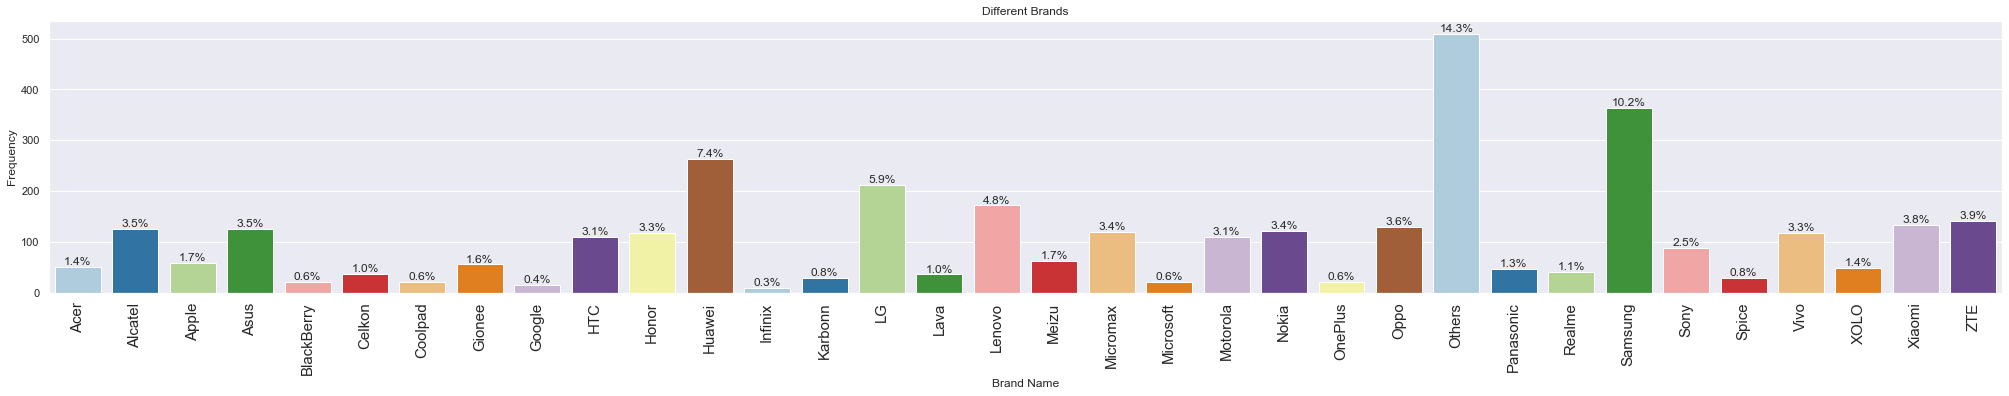

In [17]:
# Using the labeled_barplot function
labeled_barplot(df, 'brand_name', 'Different Brands', 'Brand Name', 'Frequency', perc=True)

#### Observations:
* Samsung is the most dominant brand in this data, when we look past the data for 'Others' category.
* Infinix and Google are the least preferred brands.

### Let's explore the OS on which the phone runs

In [18]:
# check unique os
df['os'].value_counts().shape

(4,)

#### Observations:
* There are 4 different OS

In [19]:
# check unique os
df['os'].value_counts()

Android    3246
Others      202
Windows      67
iOS          56
Name: os, dtype: int64

#### Observations:
* Out of the 4 different OS, Android is the most available.
* Out of the 4 different OS, iOS is the least available.

### Q:What percentage of the used phone market is dominated by Android devices?

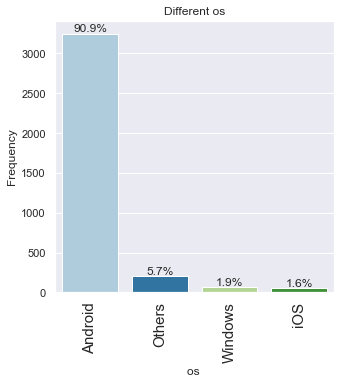

In [20]:
# Using the labeled_barplot function
labeled_barplot(df, 'os', 'Different os', 'os ', 'Frequency', perc=True)

#### Observations:
* From the graph, it is clear that 90.9% of the used mobile phone market is dominated by Android OS.

### Let's explore the screen size

In [21]:
#Statistics for screen size
df['screen_size'].describe()

count    3571.000000
mean       14.803892
std         5.153092
min         2.700000
25%        12.700000
50%        13.490000
75%        16.510000
max        46.360000
Name: screen_size, dtype: float64

#### Graphical visualization:

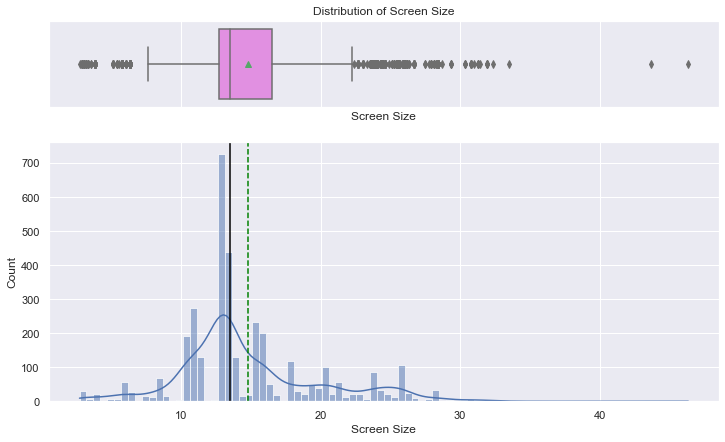

In [22]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'screen_size', 'Distribution of Screen Size', 'Screen Size')
#plt.savefig('Size',dpi=300,bbox_inches='tight')

#### Observations:
* The distribution of screen size is right skewed with more outliers on the right.
* It has a median of 13.49 which is less than the mean 14.80.
* The screen size has a maximum value of 46cm and minimum value of 2cm which indicates the presence of outliers.

### Let's explore the variable 4g

#### Graphical visualization:

In [23]:
# check unique values of 4g
df['4g'].value_counts()

yes    2359
no     1212
Name: 4g, dtype: int64

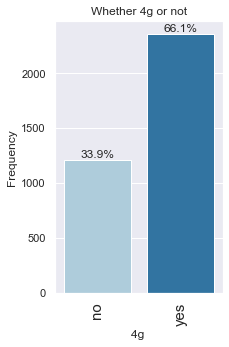

In [24]:
# Using the labeled_barplot function
labeled_barplot(df, '4g', 'Whether 4g or not', '4g ', 'Frequency', perc=True)

#### Observations:
* 66.1% of the used phones have 4g availability.
* The variable 4g has two unique values- 'yes' and 'no'
* Out of the 3571 entries, 2359 entries have the 4g availability.

### Let's explore the variable 5g

In [25]:
# check unique values of 5g
df['5g'].value_counts()

no     3419
yes     152
Name: 5g, dtype: int64

#### Graphical visualization:

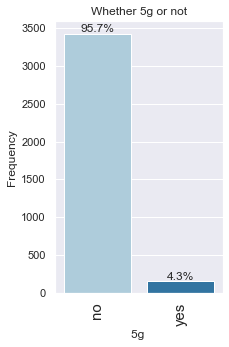

In [26]:
# Using the labeled_barplot function
labeled_barplot(df, '5g', 'Whether 5g or not', '5g ', 'Frequency', perc=True)

#### Observations:
- The variable 5g has 2 unique values - 'yes' and 'no'.
- Only 4.3% of the used phones have 5g availability.
- Out of the 3571 entries, 3419 used phones do not have the 5g availability.

### Let's explore the resolution of the main camera in megapixels

In [27]:
# check unique main camera resolution
df['main_camera_mp'].value_counts().shape

(44,)

#### Observations:
- There are 44 unique main camera types.

In [28]:
# check unique main camera resolution
df['main_camera_mp'].value_counts()

13.00    1052
8.00      780
5.00      561
12.00     212
2.00      176
16.00     155
3.15      123
0.30       85
10.50      34
1.30       27
23.00      19
21.00      19
20.70      16
20.00      13
14.50      13
12.20      12
4.00       10
12.30       9
8.10        9
19.00       8
13.10       6
10.00       6
24.00       5
12.50       5
3.00        5
6.70        4
6.50        4
48.00       4
0.08        3
21.20       2
2.10        1
12.65       1
12.60       1
20.10       1
1.90        1
1.20        1
41.00       1
16.30       1
22.50       1
22.60       1
1.00        1
20.20       1
21.50       1
18.00       1
Name: main_camera_mp, dtype: int64

#### Observations:
- Most of the used phones are of the main camera resolution of 13, 8 or 5 Mega Pixels.

#### Graphical visualization:

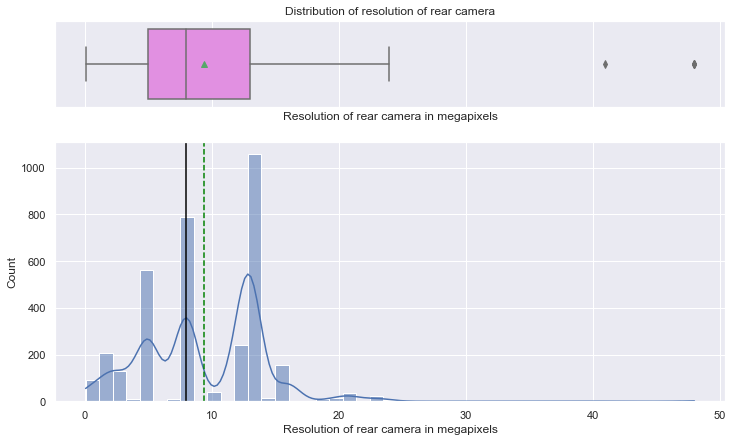

In [29]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'main_camera_mp', 'Distribution of resolution of rear camera', 'Resolution of rear camera in megapixels')

#### Observations:
- The distribution of resolution of main camera is right skewed.
- The boxplot indicates the presence of outliers.

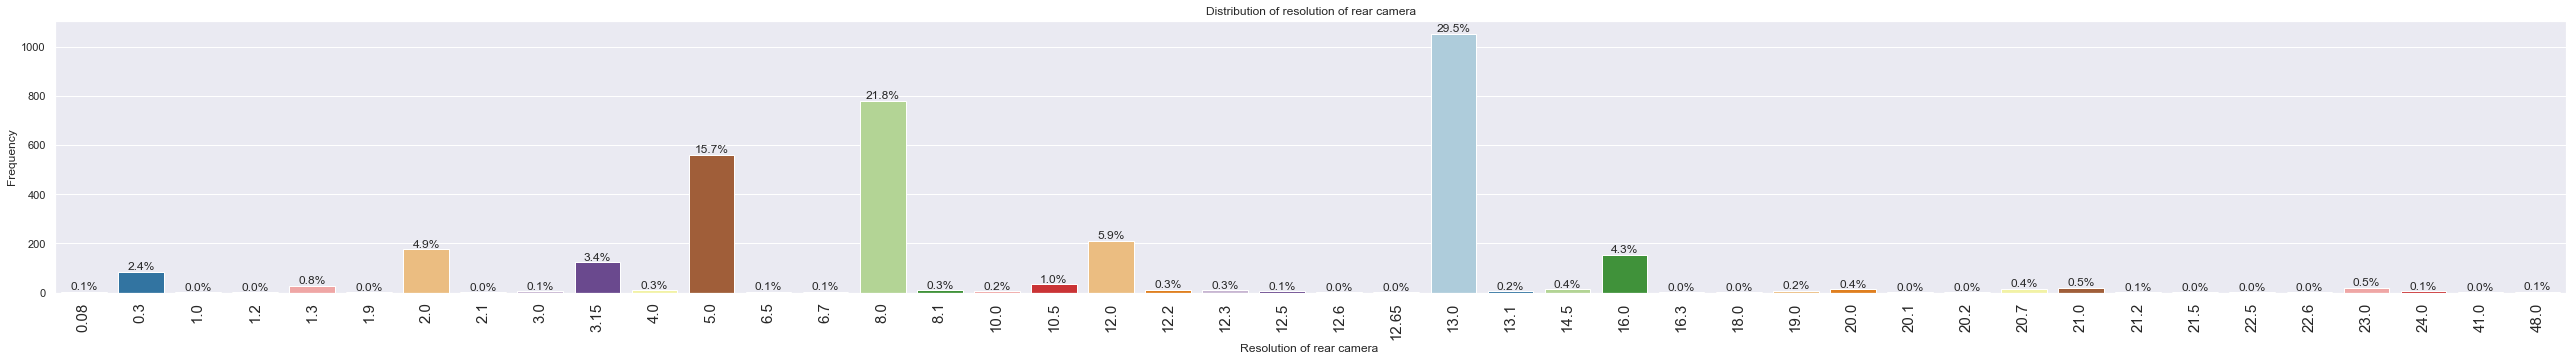

In [30]:
# Using the labeled_barplot function
labeled_barplot(df, 'main_camera_mp', 'Distribution of resolution of rear camera', 
                'Resolution of rear camera ', 'Frequency', perc=True)

#### Observations:
- More than 60% of the used phones are having the main camera resolution of 13,8 or 5 megapixels.

### Let's explore the resolution of the front camera in megapixels

In [31]:
# check unique selfie camera resolution
df['selfie_camera_mp'].value_counts().shape

(37,)

#### Observations:
- There are 37 types of unique selfie camera.

In [32]:
# check unique selfie camera 
df['selfie_camera_mp'].value_counts()

5.00     825
8.00     577
2.00     557
0.30     508
16.00    305
1.30     153
32.00     94
13.00     90
20.00     68
1.20      47
1.60      38
2.10      37
1.00      34
24.00     30
7.00      29
25.00     28
12.00     21
4.00      20
1.25      18
1.90      12
2.20      11
10.00     10
5.10       9
6.00       8
3.00       7
9.00       7
14.50      5
1.10       5
14.00      3
3.70       3
10.50      2
18.00      2
0.65       2
1.80       1
3.50       1
16.30      1
0.90       1
Name: selfie_camera_mp, dtype: int64

#### Observations:
- 825 used phones are having the selfie camera of 5 mega pixels.
- Most of the phones in the data set have the selfie camera of 5,8 or 2 MP.

#### Graphical visualization:

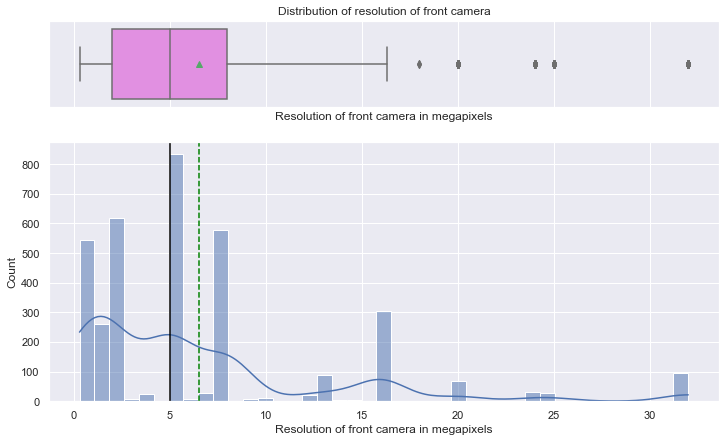

In [33]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'selfie_camera_mp', 'Distribution of resolution of front camera',
                  'Resolution of front camera in megapixels')

#### Observations:
* The distribution of selfie camera resolution is right skewed.
* The box plot indicates the presence of outliers.

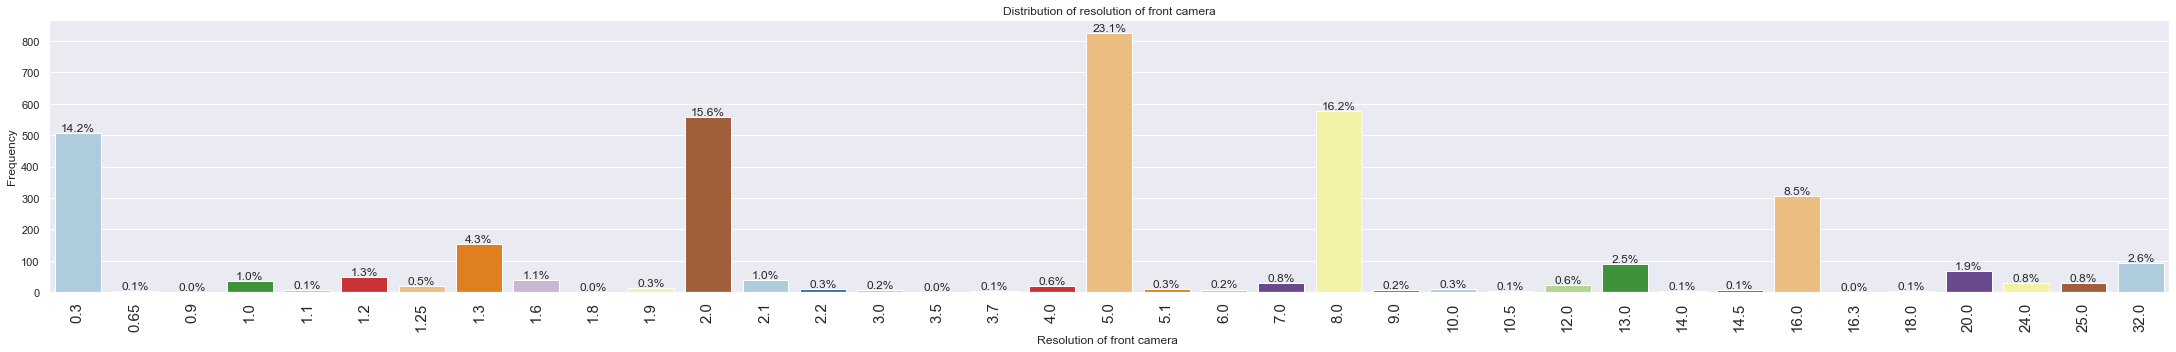

In [34]:
# Using the labeled_barplot function

labeled_barplot(df, 'selfie_camera_mp', 'Distribution of resolution of front camera',
                'Resolution of front camera ', 'Frequency', perc=True)

#### Observations:
* 23.1% of the used phones have a selfie camera of 5.0mp.
* 2.6% of the phone dataset have highest possible selfie camera mp of 32.0mp.
* 14.2% of the phone dataset have smallest possible selfie camera mp of 0.3mp.

### Let's explore the amount of internal memory (ROM) in GB

In [35]:
# check unique categories
df['int_memory'].value_counts().shape

(16,)

#### Observations:
There are 16 unique internal memory sizes.

In [36]:
# check unique categories
df['int_memory'].value_counts()

16.000      1339
32.000      1120
64.000       520
128.000      376
256.000       94
512.000       45
4.000         23
8.000         13
0.005          9
1024.000       8
0.020          5
0.500          4
0.200          2
24.000         1
0.060          1
0.010          1
Name: int_memory, dtype: int64

#### Observations:
- Most of the phones have the internal memory of 16GB.

#### Graphical Visualization:

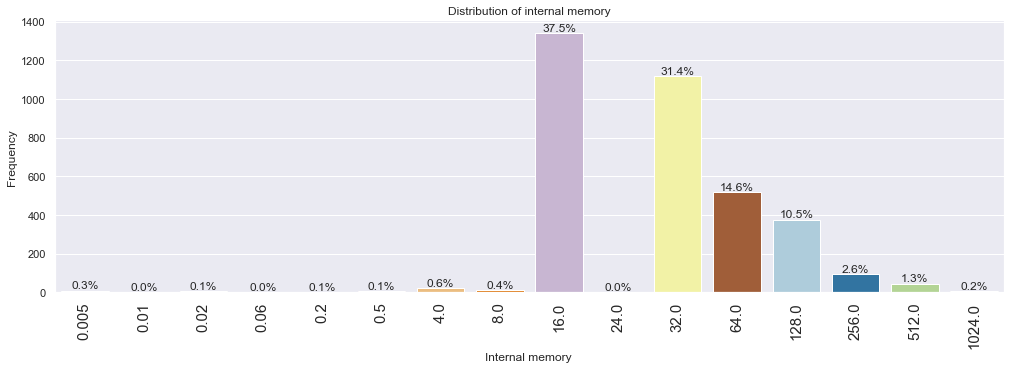

In [37]:
# Using the labeled_barplot function
labeled_barplot(df, 'int_memory', 'Distribution of internal memory', 'Internal memory ', 'Frequency', perc=True)

#### Observations:
- 37.5% of the phones have an internal memory of 16GB
- Over 98% of the phones have an internal memory of atleast 16GB
- 0.2% of the phones have an internal memory of 1024GB

### Let's explore amount of RAM in GB

In [38]:
# check unique RAM
df['ram'].value_counts().shape

(14,)

#### Observations:
- There are 14 unique RAM types

In [39]:
# check unique os
df['ram'].value_counts()

4.00     2918
6.00      155
8.00      132
0.25      103
2.00       90
3.00       82
1.00       37
12.00      18
0.50       11
2.50        4
16.00       4
0.03        3
1.50        2
0.75        2
Name: ram, dtype: int64

#### Graphical visualization:

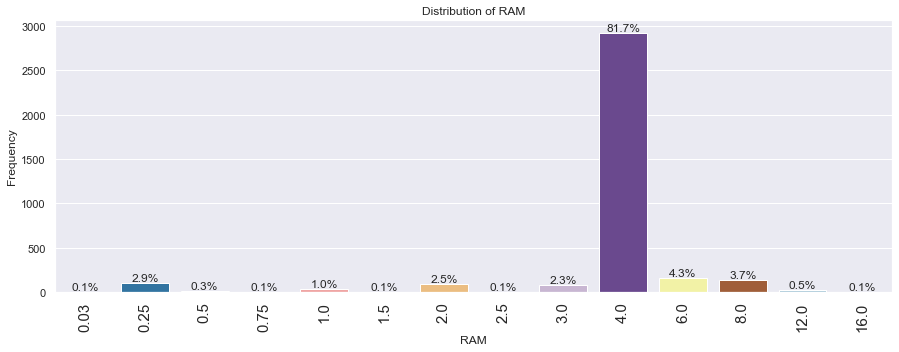

In [40]:
# Using the labeled_barplot function
labeled_barplot(df, 'ram', 'Distribution of RAM', 'RAM', 'Frequency', perc=True)

#### Observations:
- About 81.7% of the used phones have 4GB RAM.

### Let's explore the energy capacity of the phone battery in mAh

In [41]:
df['battery'].describe()

count     3565.000000
mean      3067.225666
std       1364.206665
min         80.000000
25%       2100.000000
50%       3000.000000
75%       4000.000000
max      12000.000000
Name: battery, dtype: float64

#### Graphical Visualization:

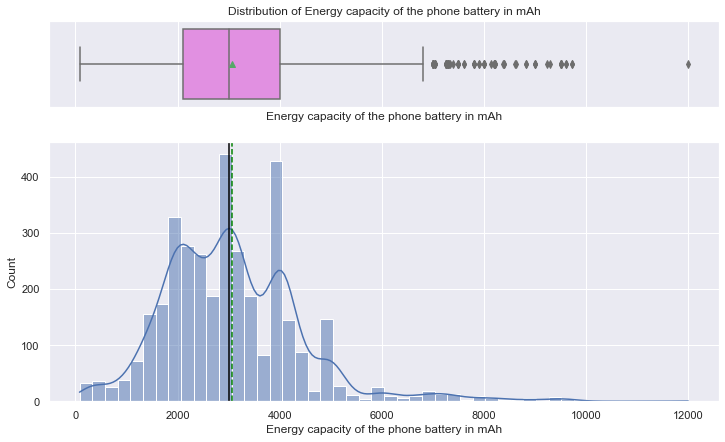

In [42]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'battery', 'Distribution of Energy capacity of the phone battery in mAh', 
                  'Energy capacity of the phone battery in mAh')

#### Observations:
- The distribution has some outliers in the upper range meaning that some batteries have way higher energy capacity than the rest
- It has a median and mean around 3000mAh

### Let's explore weight of the phone in grams

In [43]:
#Stastics of Weight
df['weight'].describe()

count    3564.000000
mean      179.424285
std        90.280856
min        23.000000
25%       140.000000
50%       159.000000
75%       184.000000
max       950.000000
Name: weight, dtype: float64

#### Graphical Visualization:

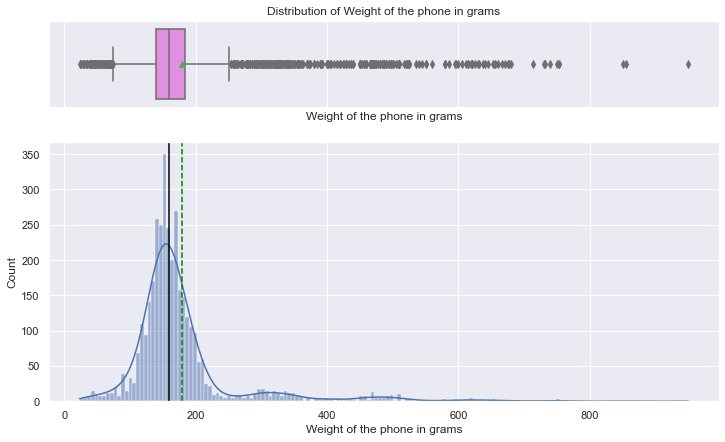

In [44]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'weight', 'Distribution of Weight of the phone in grams', 'Weight of the phone in grams')

#### Observations:
* From the graph, we can see that the distribution is right skewed.
* It has a median of 159 which is less than the mean value.
* The max value is 950 which indicates that there are outliers.

### Let's explore the year when the phone model was released

In [45]:
# check unique year
df['release_year'].value_counts().shape

(8,)

In [46]:
# check unique year values
df['release_year'].value_counts()

2014    658
2013    587
2015    539
2019    464
2016    397
2018    333
2017    313
2020    280
Name: release_year, dtype: int64

#### Graphical Visualization:

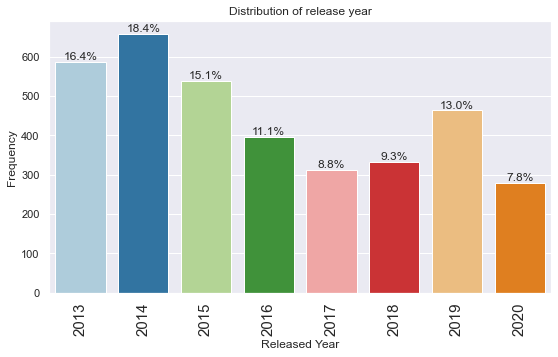

In [47]:
# Using the labeled_barplot function
labeled_barplot(df, 'release_year', 'Distribution of release year', 'Released Year', 'Frequency', perc=True)

#### Observations:
* About 18.4% of the phones were released in 2014.
* The data set contains the least amount of phones released in 2020.

### Let's explore the number of days the used/refurbished phone has been used

In [48]:
#Stastics of Days_Used
df['days_used'].describe()

count    3571.000000
mean      675.391487
std       248.640972
min        91.000000
25%       536.000000
50%       690.000000
75%       872.000000
max      1094.000000
Name: days_used, dtype: float64

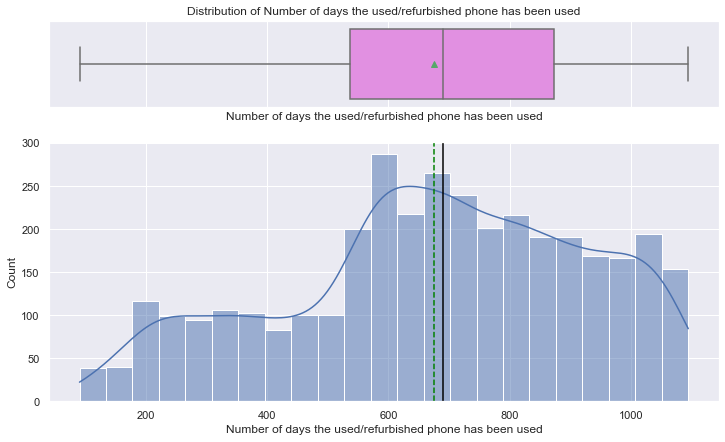

In [49]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'days_used', 'Distribution of Number of days the used/refurbished phone has been used', 
                  'Number of days the used/refurbished phone has been used')

#### Observations:
* The days used has a left skewed distribution.
* It has a mean of 675 and median of 690.
* From the boxplot, we can see that there are no outliers.

### Let's explore the price of a new phone of the same model in euros

In [50]:
#Stastics of New_price
df['new_price'].describe()

count    3571.000000
mean      237.389037
std       197.545581
min         9.130000
25%       120.130000
50%       189.800000
75%       291.935000
max      2560.200000
Name: new_price, dtype: float64

#### Graphical Visualization:

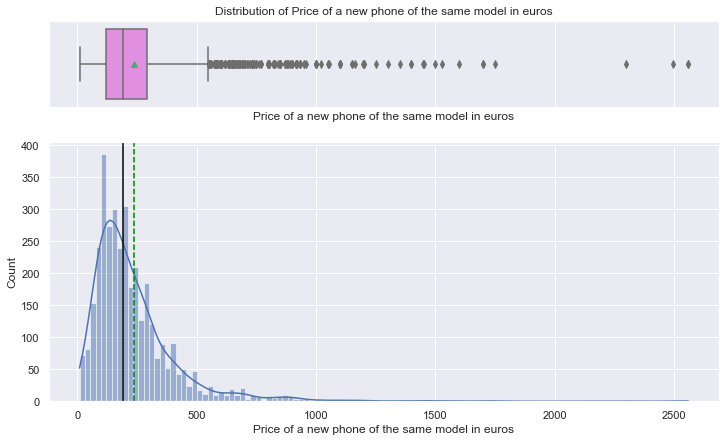

In [51]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'new_price', 'Distribution of Price of a new phone of the same model in euros', 
                  'Price of a new phone of the same model in euros')

#### Observations:
* From the graph, we can see that it is right skewed.
* The median is less than that of mean value.
* The distribution also has a lot of outliers.

### Let's explore the price of the used/refurbished phone in euros

In [52]:
#Stastics of Used_price
df['used_price'].describe()

count    3571.000000
mean      109.880277
std       121.501226
min         2.510000
25%        45.205000
50%        75.530000
75%       126.000000
max      1916.540000
Name: used_price, dtype: float64

### Q: What does the distribution of used phone prices look like?

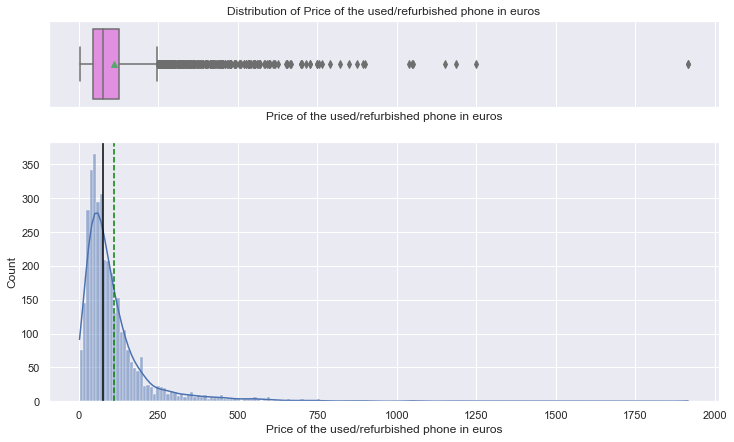

In [53]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'used_price', 'Distribution of Price of the used/refurbished phone in euros',
                  'Price of the used/refurbished phone in euros')

#### Observations:
* The distribution of used price right skewed.
* It is similar to that of the new price.
* The boxplot indicates the presence of outliers which means some used phones are expensive.
* Mean is 109.9 much greater than median due to extreme values towards higher end.

## Bivariate Analysis

### Let's explore the relationship between RAM and Manufacturing Brands

### Q: The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

In [54]:
#Statistic of RAM by Brand Name
df.groupby("brand_name")["ram"].mean()

brand_name
Acer          3.901961
Alcatel       3.426000
Apple         4.000000
Asus          4.047619
BlackBerry    3.829545
Celkon        1.466216
Coolpad       3.954545
Gionee        3.933036
Google        4.533333
HTC           4.000000
Honor         4.593220
Huawei        4.641326
Infinix       2.600000
Karbonn       3.375000
LG            3.893868
Lava          3.277778
Lenovo        3.886628
Meizu         4.451613
Micromax      3.750000
Microsoft     4.000000
Motorola      3.945455
Nokia         3.601351
OnePlus       6.363636
Oppo          4.961240
Others        3.751041
Panasonic     4.000000
Realme        4.195122
Samsung       4.159341
Sony          4.068182
Spice         3.750000
Vivo          4.756410
XOLO          4.000000
Xiaomi        4.567164
ZTE           4.023050
Name: ram, dtype: float64

#### Graphical Visualization:

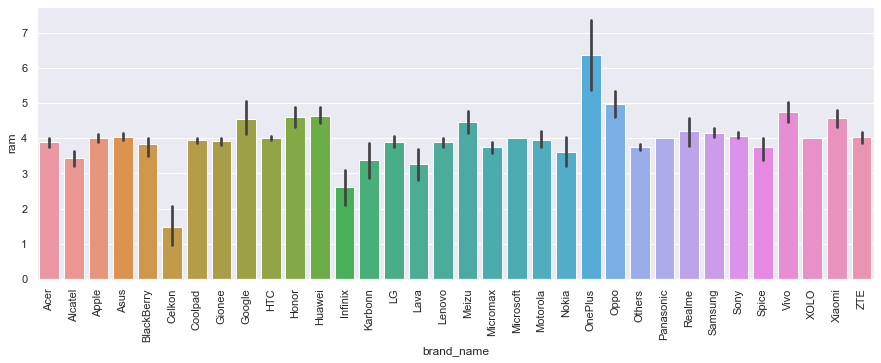

In [55]:
#Barplot representing the relationship
plt.figure(figsize=(15, 5))
sns.barplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)
plt.show()

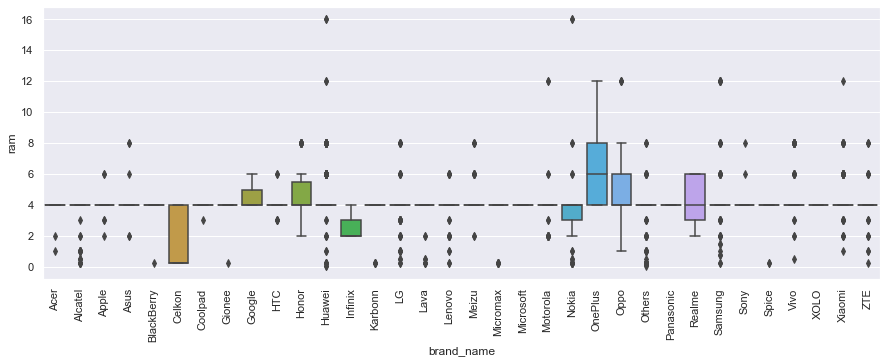

In [56]:
#Boxplot representing the relationship
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)
plt.show()

#### Observations:
- Each brand has on an average 4GB of RAM in their phones.
- OnePlus is the brand with a mean around 6GB

### Let's explore the relationship between battery and weight among different brands

### Q: A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

In [57]:
#Data for phones with battery more than 4500mAh
bat = df[df['battery']>4500]

bat["weight"].describe()

count    346.000000
mean     330.718786
std      160.952677
min       23.000000
25%      198.000000
50%      299.000000
75%      467.000000
max      950.000000
Name: weight, dtype: float64

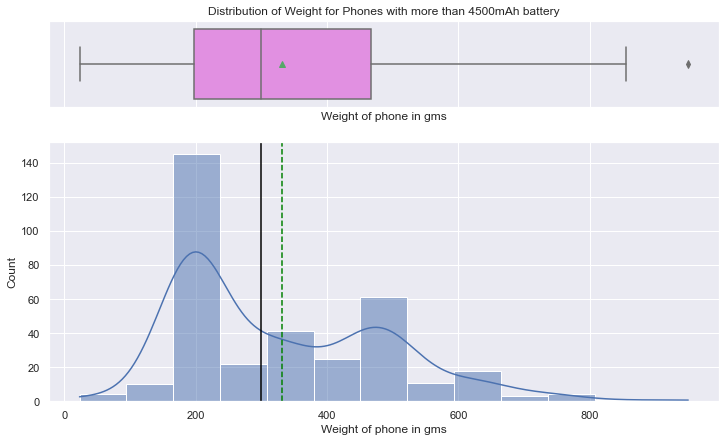

In [58]:
# Using the histogram_boxplot function
histogram_boxplot(bat, 'weight', 'Distribution of Weight for Phones with more than 4500mAh battery',
                  'Weight of phone in gms')

#### Observations:
* For phones with large battery, a large number of phones weigh around or above 200gms.
* However, there are outliers from as small as 23gms to 950gms.

### Let's explore the relationship between screen size and manufacturing brand

### Q: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?

#### Changing units from cm to inches

In [59]:
#Changing Units of screen size from cm to inches.
print(df['screen_size'].head(2))
df['screen_size'] = df['screen_size'].apply(lambda sz: round(sz * 0.393701, 2))
df['screen_size'].head(2)

0    23.97
1    28.10
Name: screen_size, dtype: float64


0     9.44
1    11.06
Name: screen_size, dtype: float64

In [60]:
# Filtering the phones having screen size greater than 6 inches
scrn_size_gt6 = df[df['screen_size']>6]
scrn_size_gt6['brand_name'].value_counts()
scrn_size_gt6.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android         9.44  yes   no            13.0   
1      Honor  Android        11.06  yes  yes            13.0   
2      Honor  Android         9.56  yes  yes            13.0   
3      Honor  Android        10.25  yes  yes            13.0   
4      Honor  Android         6.19  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price  used_price  
0        127     111.62       86.96  
1        325     249.39      161.49  
2        162     359.47      268.55  
3        345     278.93      180.23  
4        293     140.87      103.80

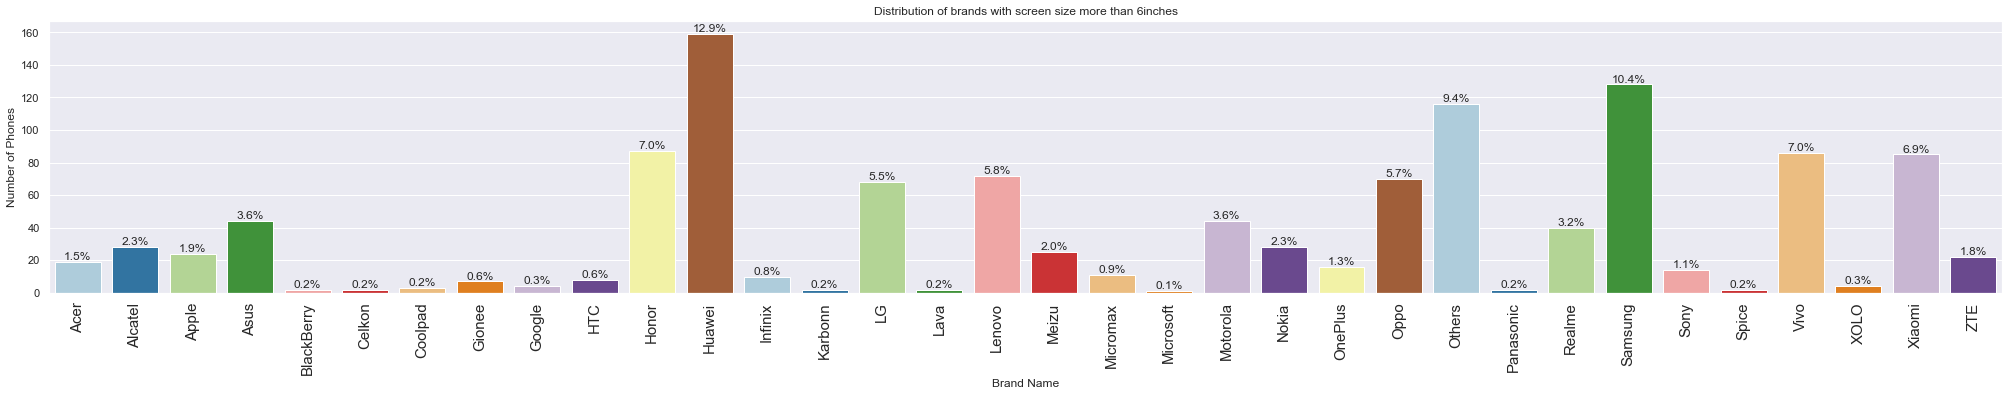

In [61]:
#Plotting the number of phones in each brand with screen size mroe than 6inches
# Using the labeled_barplot function
labeled_barplot(scrn_size_gt6, 'brand_name', 'Distribution of brands with screen size more than 6inches', 
                'Brand Name', 'Number of Phones', perc=True)

#### Observations:
* Huwaei has the highest number of phones with more than 6inches of screen size.
* Microsoft is the brand with least number of phones having screen size more than 6 inches.

### Q: Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

In [62]:
#Data with selfie camera greater than 8MP
slf_cm_gt8 = df[df['selfie_camera_mp']>8]

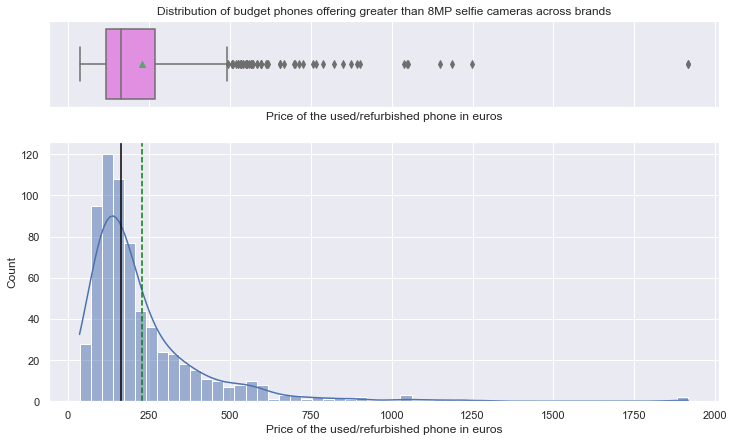

In [63]:
# Using the histogram_boxplot function
histogram_boxplot(slf_cm_gt8, 'used_price', 
                  'Distribution of budget phones offering greater than 8MP selfie cameras across brands',
                  'Price of the used/refurbished phone in euros')

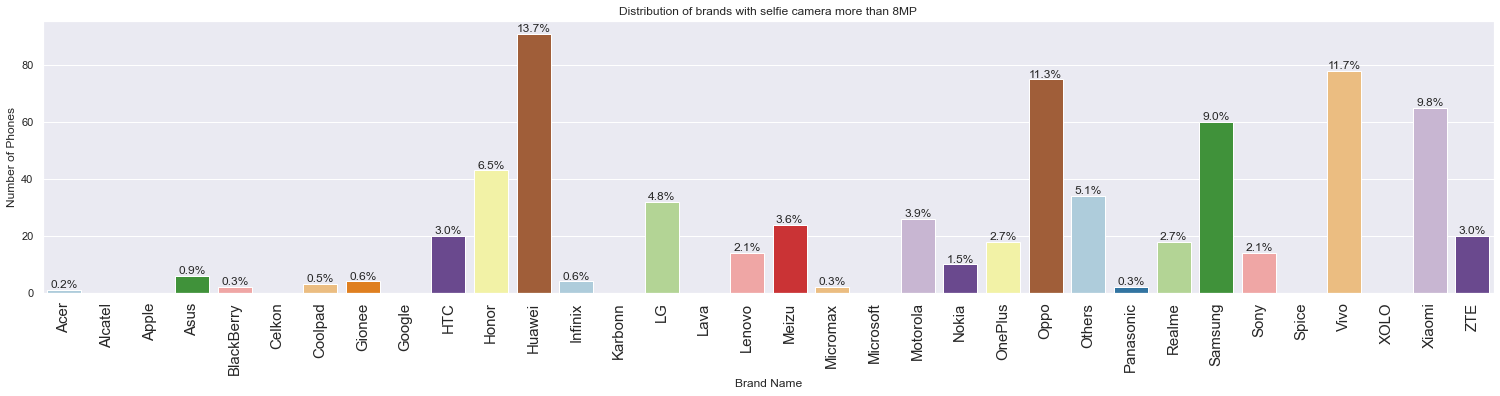

In [64]:
#Plotting the number of phones in each brand with selfie camera more than 8MP
# Using the labeled_barplot function
labeled_barplot(slf_cm_gt8, 'brand_name', 'Distribution of brands with selfie camera more than 8MP', 
                'Brand Name', 'Number of Phones', perc=True)

#### Observations:
* Distribution of used price (untransformed) is right skewed for budget phones with selfie camera more than 8MP
* Huwaei tops the list in this category

### Relationship between Price of the used phone and Manufacturing Brands

In [65]:
#Statistic of Price of Used phone by Brand Name
df.groupby("brand_name")["used_price"].mean()

brand_name
Acer           63.798431
Alcatel        55.326080
Apple         293.228814
Asus          103.764921
BlackBerry    102.039091
Celkon         22.648378
Coolpad        77.928182
Gionee         91.881964
Google        239.211333
HTC            99.626000
Honor         132.285932
Huawei        176.256894
Infinix        68.979000
Karbonn        38.069333
LG            115.853726
Lava           40.112778
Lenovo         77.147500
Meizu         126.515484
Micromax       38.134417
Microsoft      55.316818
Motorola      107.695636
Nokia          59.393719
OnePlus       318.515909
Oppo          180.845271
Others         78.492102
Panasonic      60.302979
Realme        124.169024
Samsung       132.083462
Sony          119.886136
Spice          32.299667
Vivo          168.190855
XOLO           47.340204
Xiaomi        137.465149
ZTE            93.621489
Name: used_price, dtype: float64

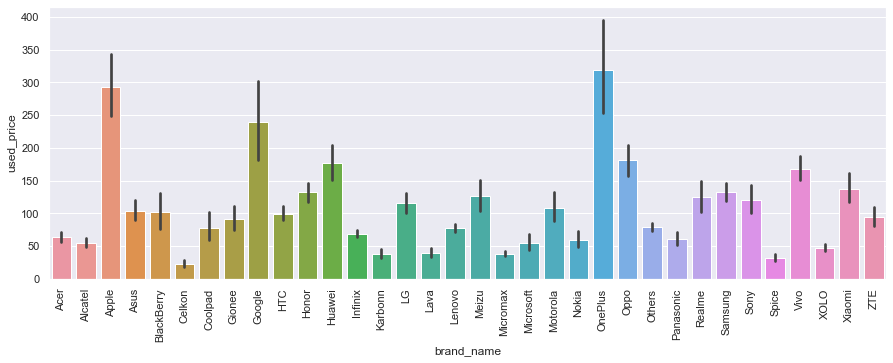

In [66]:
#Barplot representing the relationship
plt.figure(figsize=(15, 5))
sns.barplot(data=df, y="used_price", x="brand_name")
plt.xticks(rotation=90)
plt.show()

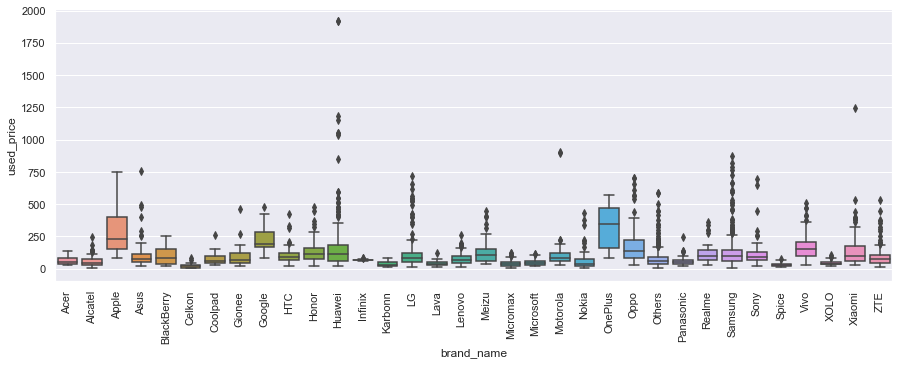

In [67]:
#Barplot representing the relationship
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, y="used_price", x="brand_name")
plt.xticks(rotation=90)
plt.show()

#### Observations:
* OnePlus and Apple are the phones which cost higher even in the used price category.
* With Google behind the two brands, rest of the brands averages below 200euros in this category.

### Relationship between Price of the used phone and OS

In [68]:
#Statistic of Price of Used phone by OS
df.groupby("os")["used_price"].mean()

os
Android    111.968598
Others      43.808366
Windows     65.083433
iOS        280.759286
Name: used_price, dtype: float64

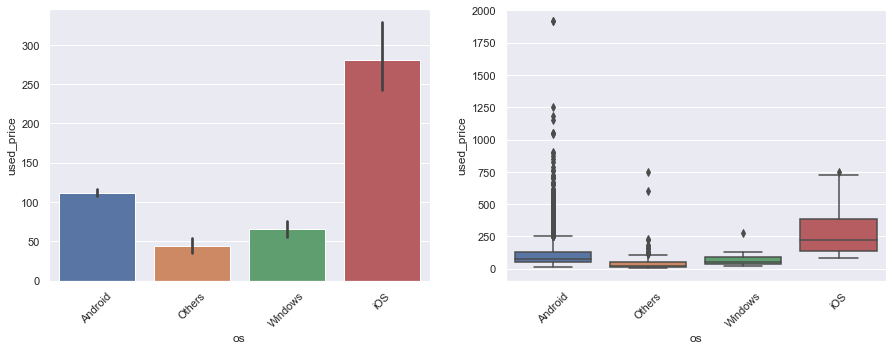

In [69]:
#Plot representing the relationship
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="used_price", x="os")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="used_price", x="os")
plt.xticks(rotation=45)

plt.show()

#### Observations:
* Cost of iOS phones is way more than other OS brands even in the used price category.

### Relationship between Price of the used phone and Screen Size

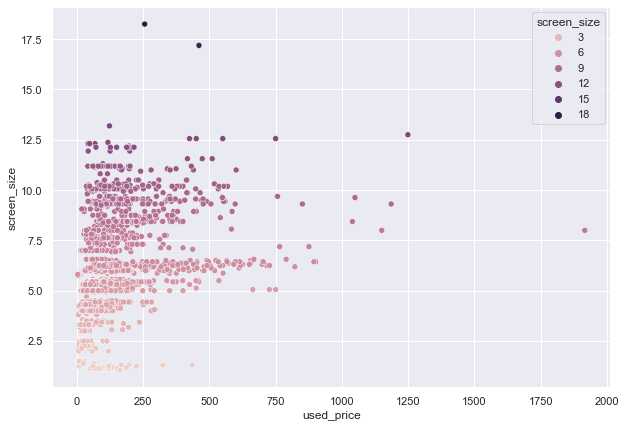

In [70]:
#PLotting the relationship
plt.figure(figsize=(10, 7))
sns.scatterplot(x="used_price", y="screen_size",  hue="screen_size", data=df)
plt.show()

#### Observations:
- There does not seem to be a very strong relationship between these two, even though we would expect cost to increase when screen size increases.

### Relationship between Price of the used phone and Resolution of rear camera

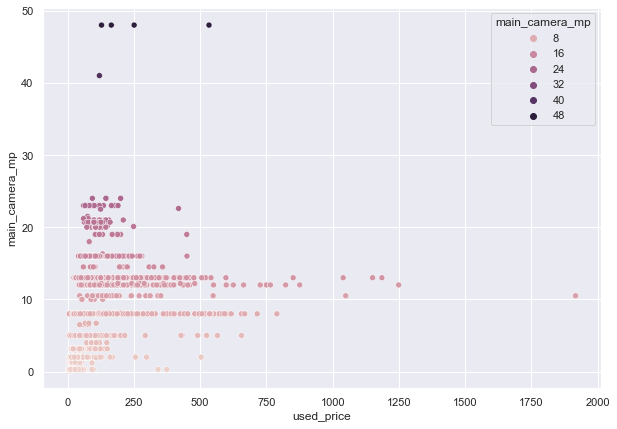

In [71]:
#PLotting the relationship
plt.figure(figsize=(10, 7))
sns.scatterplot(x="used_price", y="main_camera_mp",  hue="main_camera_mp", data=df)
plt.show()

#### Observations:
- Price is varying within the same camera specification which ascertains that there seem to be no specific correlation between these characteristics in this data

### Relationship between Price of the used phone and resolution of front camera

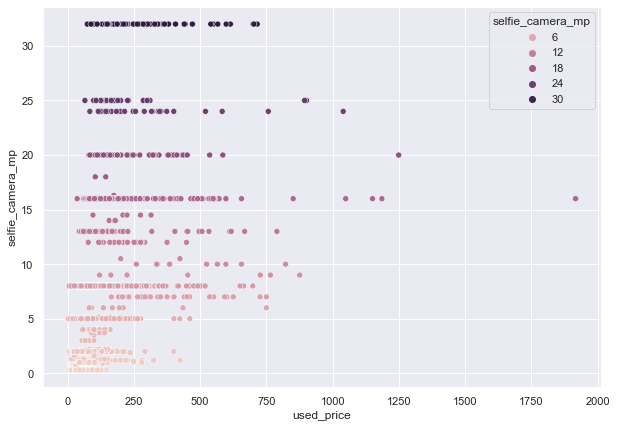

In [72]:
#PLotting the relationship
plt.figure(figsize=(10, 7))
sns.scatterplot(x="used_price", y="selfie_camera_mp",  hue="selfie_camera_mp", data=df)
plt.show()

#### Observations:
- Even though there are high end selfie camera phones with respect to the specification, the price is varying within that in this data. We would have to look at the correlation plot to understand more.

### Relationship between Price of the used phone and release year

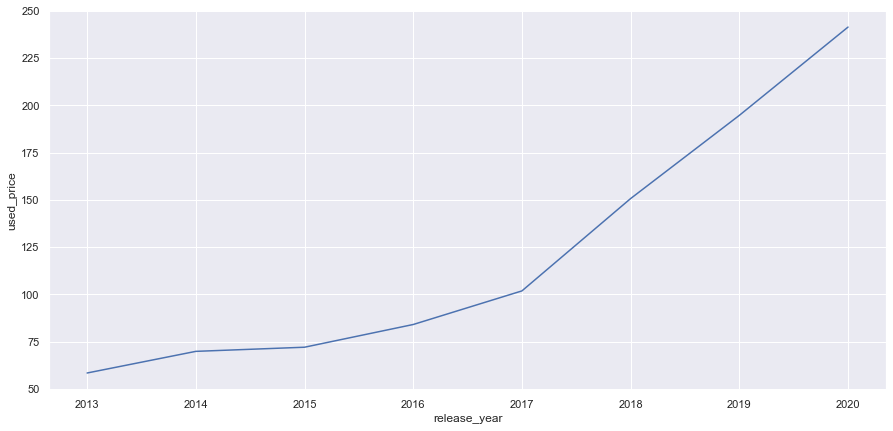

In [73]:
#PLotting the relationship
plt.figure(figsize=(15, 7))
sns.lineplot(x="release_year", y="used_price", data=df, ci=None)
plt.show()

#### Observations:
- It depicts an almost linear relationship between these variables.
- Phones released in the later years have a higher used price

### Relationship between Price of the used phone and number of days used

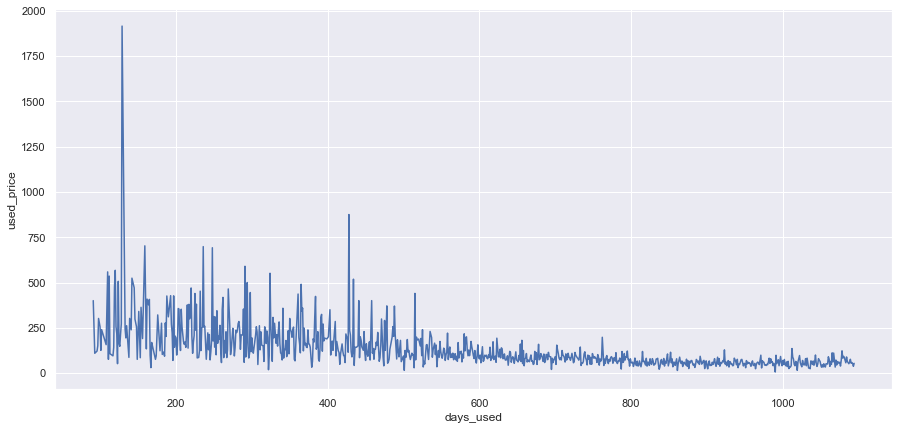

In [74]:
#PLotting the relationship
plt.figure(figsize=(15, 7))
sns.lineplot(x="days_used", y="used_price", data=df, ci=None)
plt.show()

#### Observations:
- There is a general trend visible in which the more a phone is used, the lesser its used price becomes.

### Relationship between Price of the used phone and price of a new phone of same model

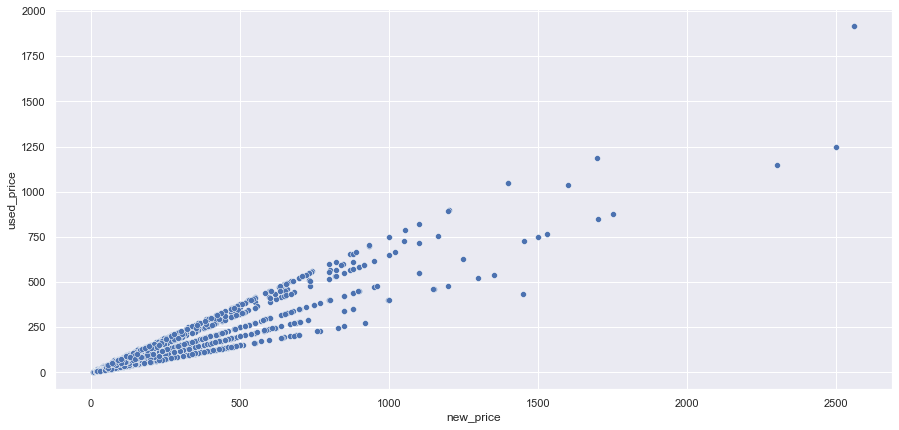

In [75]:
#PLotting the relationship
plt.figure(figsize=(15, 7))
sns.scatterplot(x="new_price", y="used_price", data=df, ci=None)
plt.show()

#### Observations:
- This graph ascertains the general assumption that a phone with a higher newer price will be getting a higher used price in the market.

### Q: Which attributes are highly correlated with the used phone price?

### Correlations

In [76]:
# correlation of all attributes with used_price
df[df.columns[:]].corr()["used_price"][:]

screen_size         0.385965
main_camera_mp      0.281065
selfie_camera_mp    0.497530
int_memory          0.404913
ram                 0.522659
battery             0.363767
weight              0.170654
release_year        0.456764
days_used          -0.470760
new_price           0.926087
used_price          1.000000
Name: used_price, dtype: float64

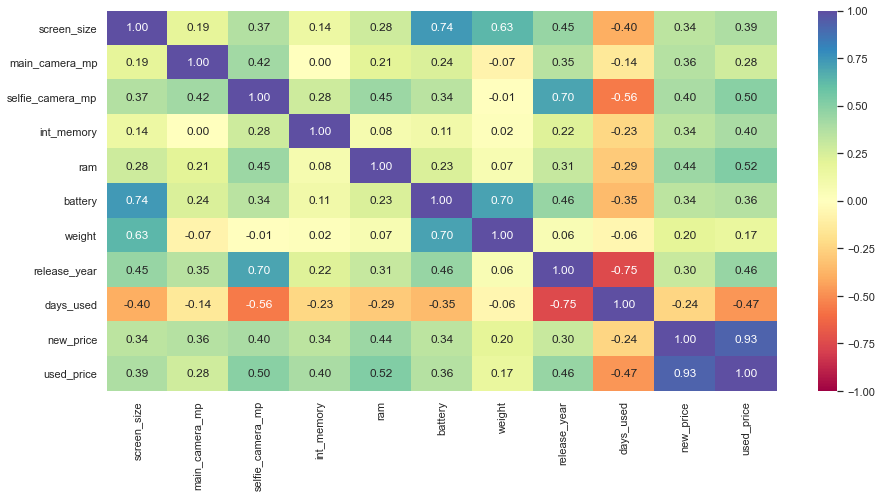

In [77]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

#### Observations:
* used_price is highly correlated with new_price. The higher new price could point to a higher used price as we saw in their bivariate analysis.
* RAM and selfie camera does also have a very close correlation with used price.
* With days used, used price has a negative correlation, which might be pointing to the fact that the longer a phone has been used the lesser the used price becomes.

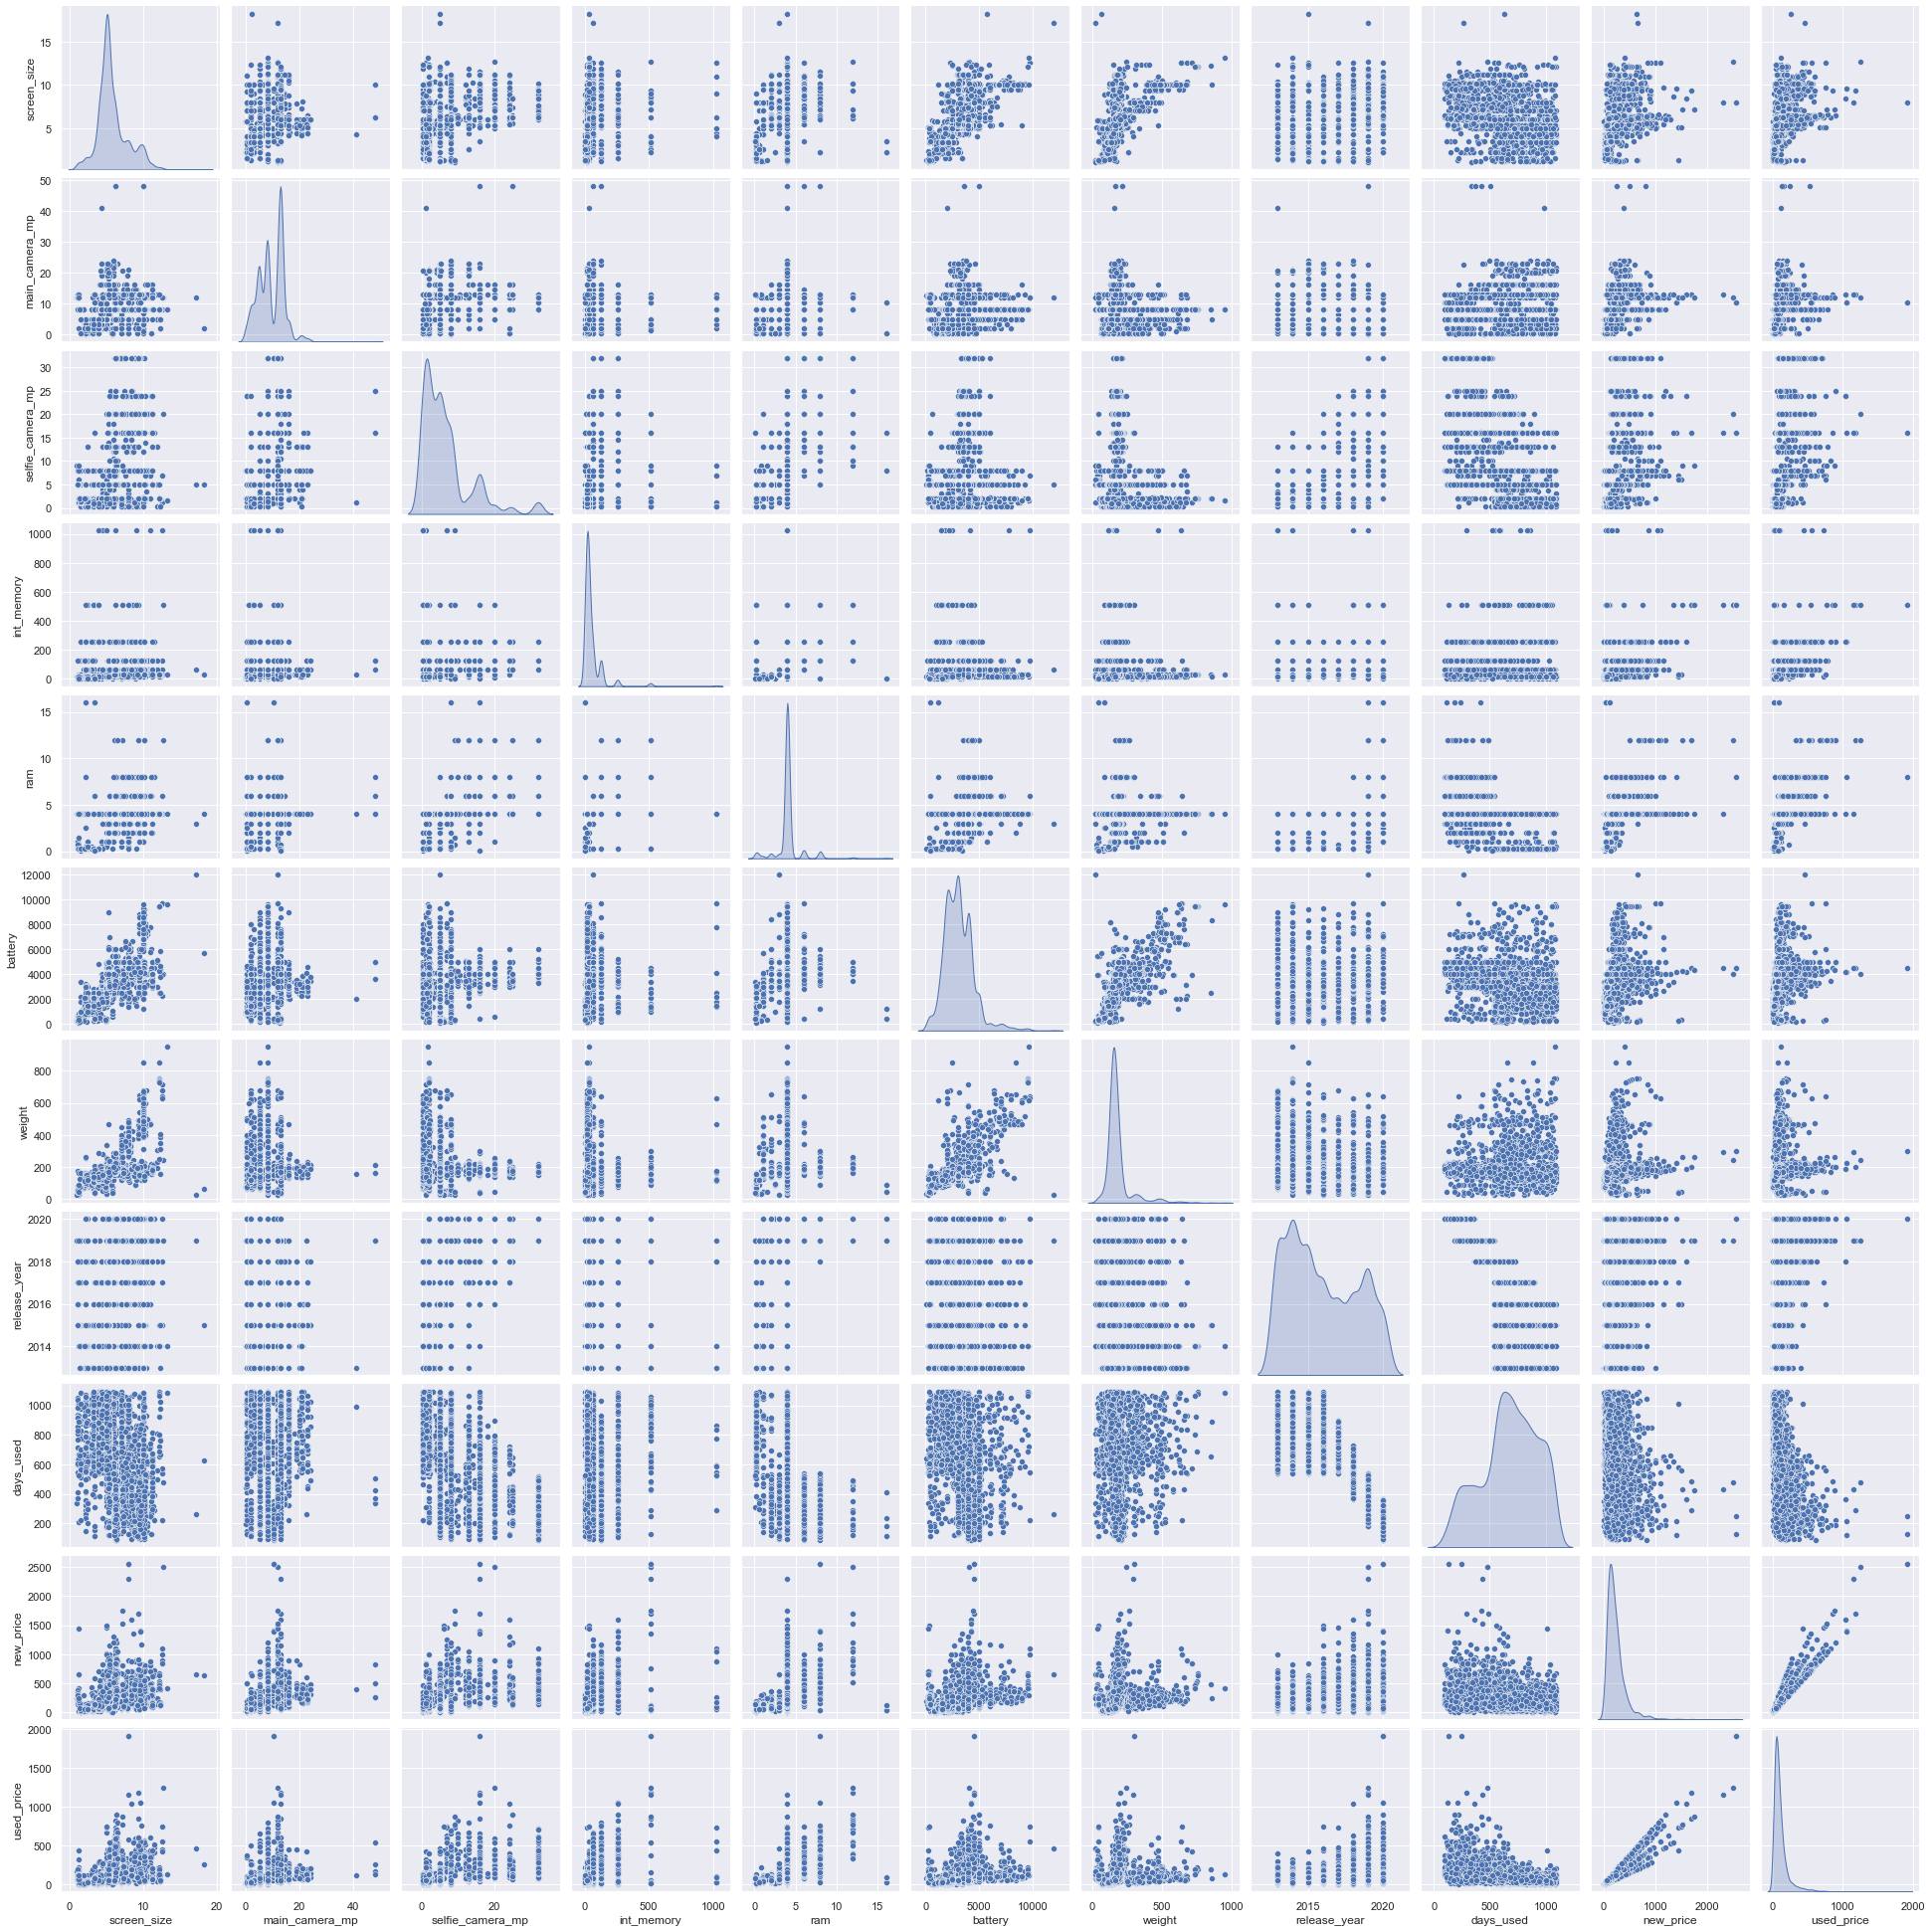

In [78]:
#cData_attr = cData.iloc[:, 0:7]
sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram on the diag

#### Observations:
* As seen in the correlation heatmap, there is an almost linear relationship between used and new price.
* There is no general trend between the other variables that are worth noting.

## Data Preprocessing

## Missing Value Treatment

**Get the info regarding missing values**

In [79]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

#### Observations:
* Among 15 columns, 6 columns are having missing values.
* The column main_camera_mp contains the most number of missing values. 

### Let's fix the missing values

* We will replace the missing values in each column with its median.

In [80]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

In [81]:
#Checking the missing values
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

#### Observations:
* All missing values have been treated.

#### Checking for duplicate values

In [82]:
df.duplicated().sum()

0

#### Observations:
- There are no duplicate records in the data.

## Feature Engineering

## Log Transformation

#### Some features are very skewed and will likely behave better on the log scale.

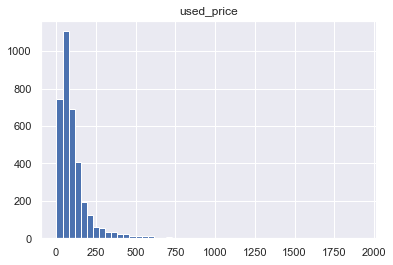

0


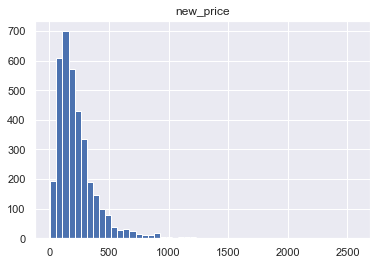

0


In [83]:
# Before log transformation
cols_to_log = ['used_price','new_price']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

In [84]:
#Applying log transformation
for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)

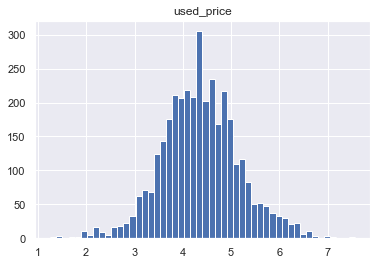

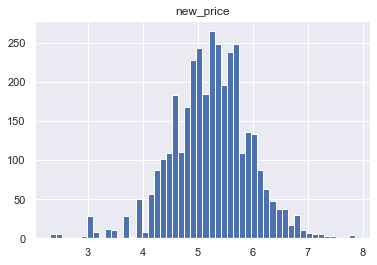

In [85]:
#After log transformation
for colname in cols_to_log:
    plt.hist(df[colname + '_log'], bins=50)
    plt.title(colname)
    plt.show()

#### Observation:
* After log transformation, the skewness of the variables has reduced.
* The distribution after log transformation is normal.

## Outlier Detection

#### Let's look at outliers in other relevant numerical columns

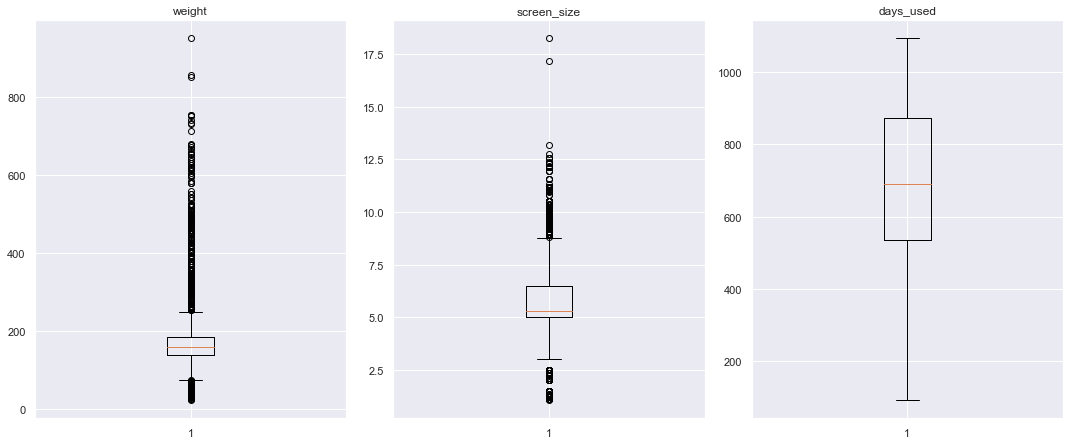

In [86]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))
numeric_columns = ['weight', 'screen_size', 'days_used']
for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
* There are no outliers in days_used.
* All other variables contain upper/lower outliers

## Outlier Treatment

In [87]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [88]:
# treating the outliers
#numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numeric_columns)

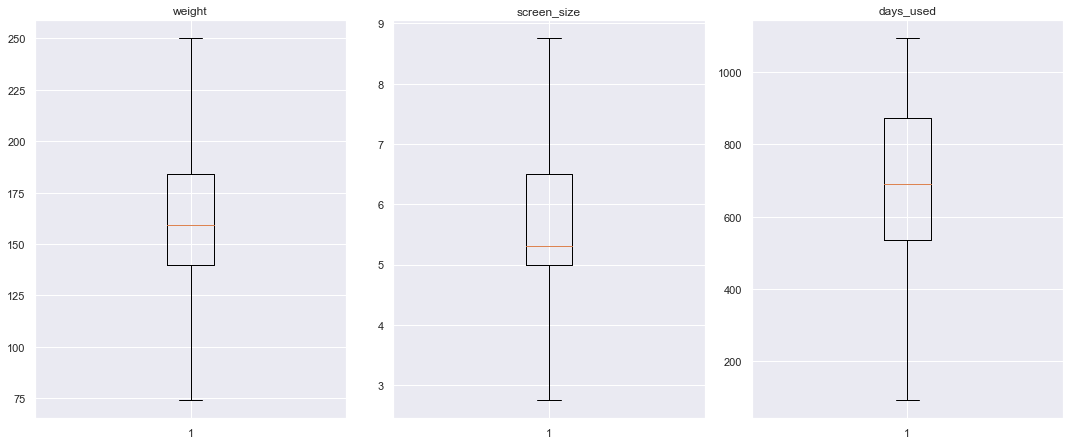

In [89]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
* All the outliers are now removed

## EDA after Data Preprocessing

- It is a good idea to explore the data once again after manipulating it.

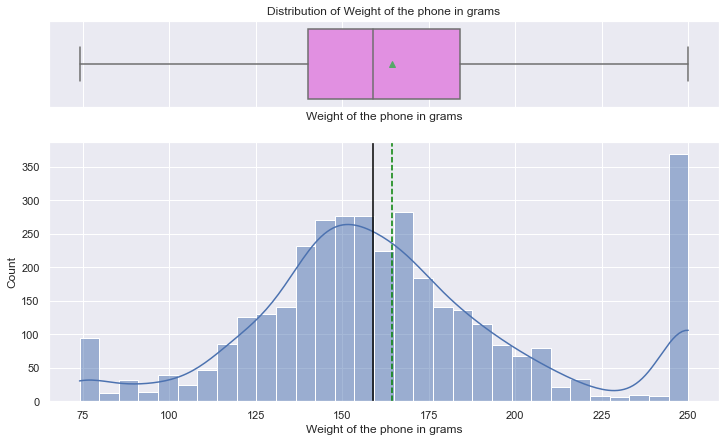

In [90]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'weight', 'Distribution of Weight of the phone in grams', 'Weight of the phone in grams')

#### Observations:
* Weight has now become more of a normally distributed data even though there is a peak at the far end because of the outliers

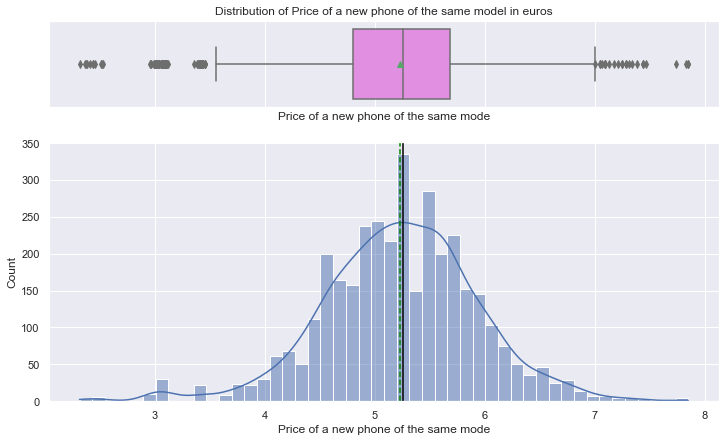

In [91]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'new_price_log', 'Distribution of Price of a new phone of the same model in euros', 
                  'Price of a new phone of the same mode')

#### Observations:
* Log transformed New price is now having a normal distrinution.

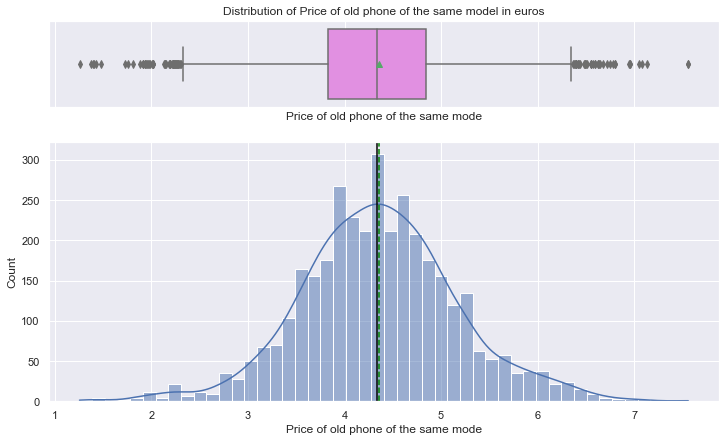

In [92]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'used_price_log', 'Distribution of Price of old phone of the same model in euros',
                  'Price of old phone of the same mode')

#### Observations:
* Log transformed used price is has also become a normally distributed data, as expected.

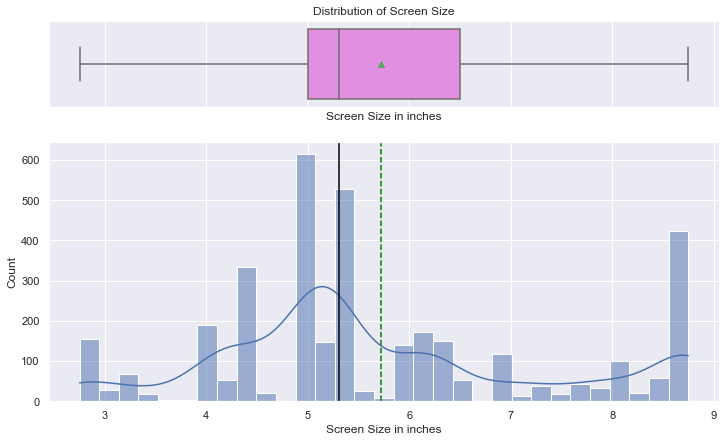

In [93]:
# Using the histogram_boxplot function
histogram_boxplot(df, 'screen_size', 'Distribution of Screen Size', 'Screen Size in inches')
#plt.savefig('Size',dpi=300,bbox_inches='tight')

#### Observations:
* Screen size, however, has not become a normally distributed data, even after outlier treatment becuase of the extensive data within it.

### Correlation plot after pre-processing of data

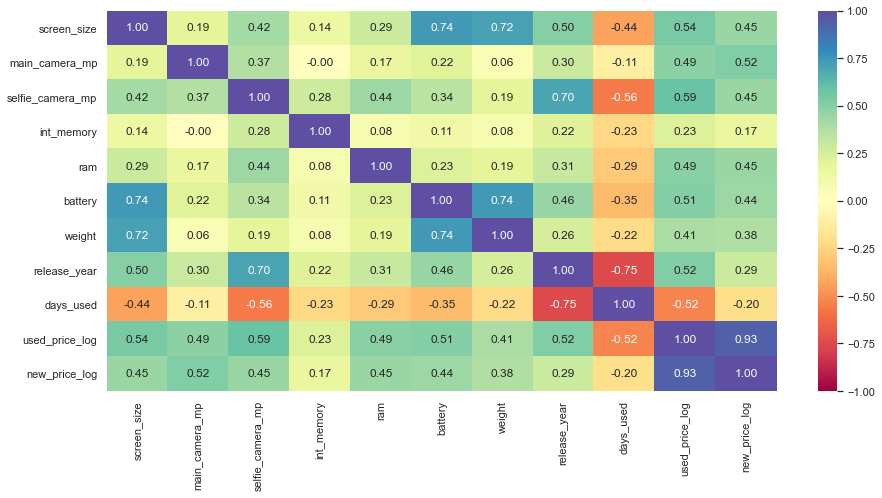

In [94]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

#### Observations:
* used_price is highly correlated with new_price.

* used_price also moderately correlated with selfie_camera_mp, screen_size, release_year and battery

* used_price is moderately correlate negatively with days_used.

### Pair plot after pre-processing of data

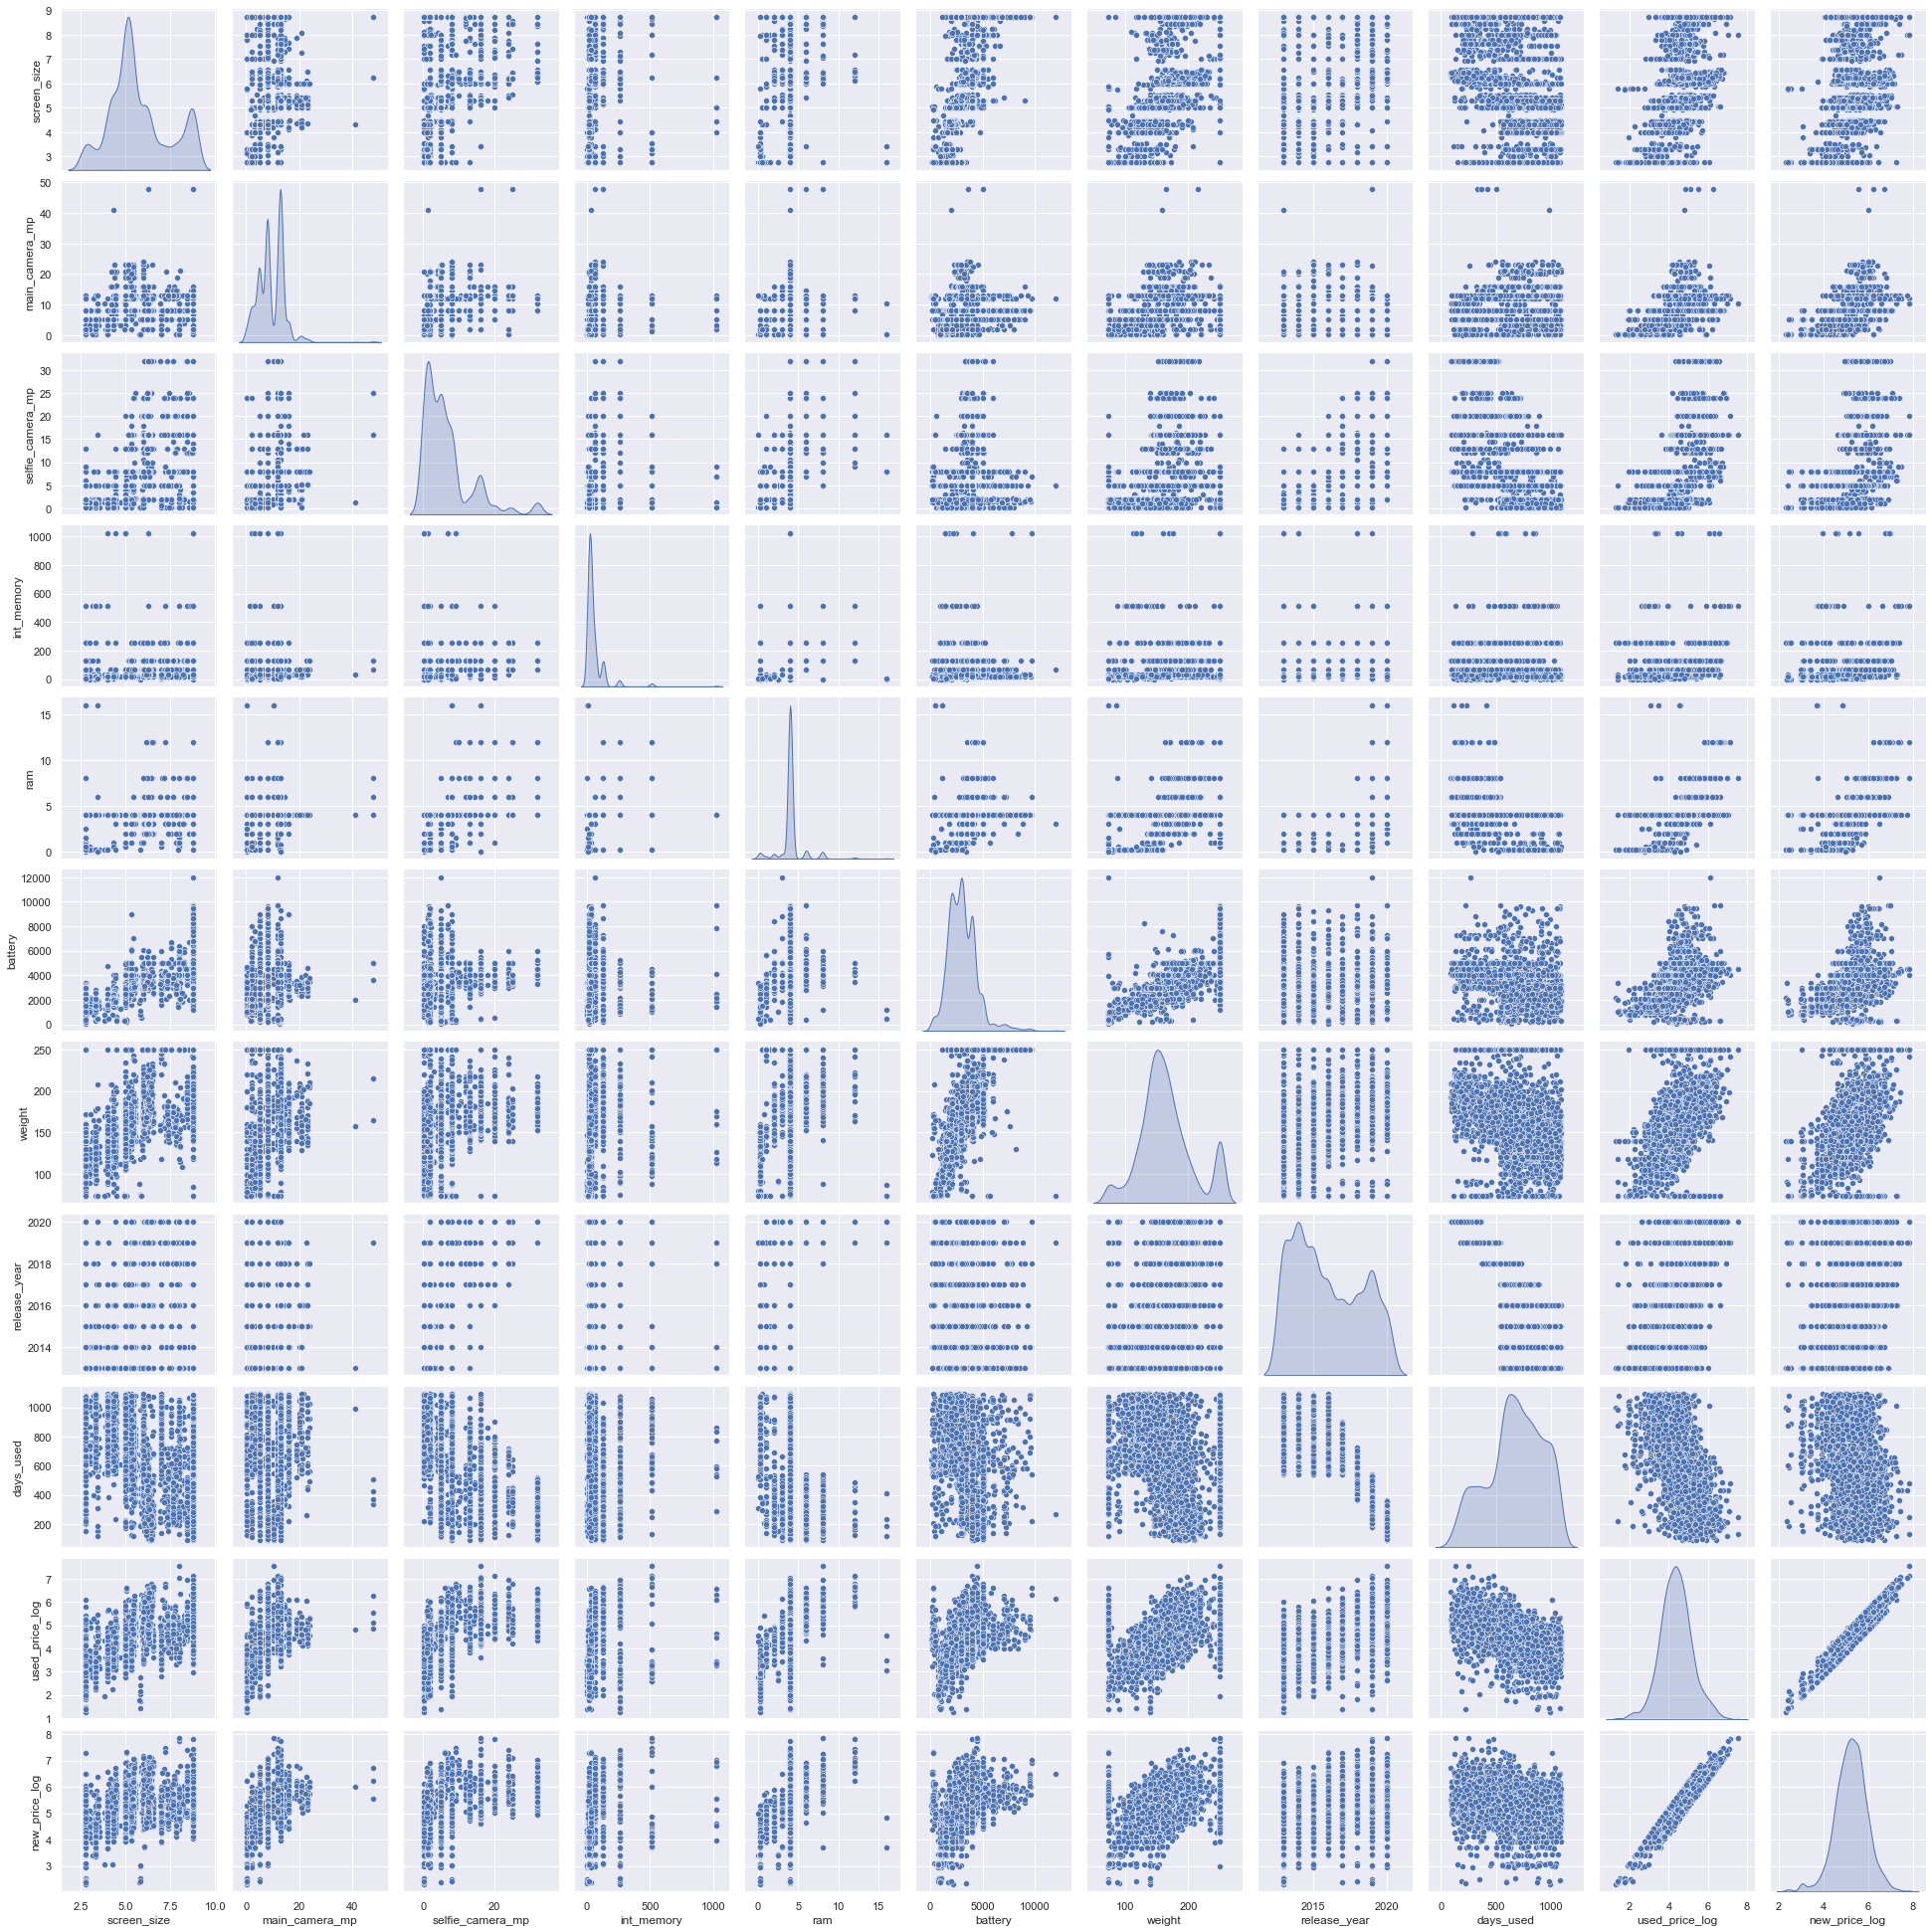

In [95]:
#cData_attr = cData.iloc[:, 0:7]
sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram on the diag

#### Observation:
* As used price and new price were log transformed, they are even more positively correlated now. 

## Building a Linear Regression model

1. We want to predict the used price.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

### Encoding Categorical columns

In [96]:
# Create dummy variables for the categorical data
df1=pd.get_dummies(df, columns=['brand_name','os','4g','5g'], drop_first=True)

In [97]:
# View head to examine new dataframe containing the encoded categorical variables
df1.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0         8.75            13.0               5.0        64.0  3.0   3020.0   
1         8.75            13.0              16.0       128.0  8.0   4300.0   
2         8.75            13.0               8.0       128.0  8.0   4200.0   
3         8.75            13.0               8.0        64.0  6.0   7250.0   
4         6.19            13.0               8.0        64.0  3.0   5000.0   

   weight  release_year  days_used  used_price_log  new_price_log  \
0   146.0          2020        127        4.476882       4.724019   
1   213.0          2020        325        5.090616       5.523020   
2   213.0          2020        162        5.596754       5.887409   
3   250.0          2020        345        5.199767       5.634540   
4   185.0          2020        293        4.652054       4.954911   

   brand_name_Alcatel  brand_name_Apple  brand_name_Asus  \
0                   0                 0                0   
1                   0                 0                0   
2                   0                 0                0   
3                   0                 0                0   
4                   0                 0                0   

   brand_name_BlackBerry  brand_name_Celkon  brand_name_Coolpad  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   

   brand_name_Gionee  brand_name_Google  brand_name_HTC  brand_name_Honor  \
0                  0                  0               0                 1   
1                  0                  0               0                 1   
2                  0                  0               0                 1   
3                  0                  0               0                 1   
4                  0                  0               0                 1   

   brand_name_Huawei  brand_name_Infinix  brand_name_Karbonn  brand_name_LG  \
0                  0                   0                   0              0   
1                  0                   0                   0              0   
2                  0                   0                   0              0   
3                  0                   0                   0              0   
4                  0                   0                   0              0   

   brand_name_Lava  brand_name_Lenovo  brand_name_Meizu  brand_name_Micromax  \
0                0                  0                 0                    0   
1                0                  0                 0                    0   
2                0                  0                 0                    0   
3                0                  0                 0                    0   
4                0                  0                 0                    0   

   brand_name_Microsoft  brand_name_Motorola  brand_name_Nokia  \
0                     0                    0                 0   
1                     0                    0                 0   
2                     0                    0                 0   
3                     0                    0                 0   
4                     0                    0                 0   

   brand_name_OnePlus  brand_name_Oppo  brand_name_Others  \
0                   0                0                  0   
1                   0                0                  0   
2                   0                0                  0   
3                   0                0                  0   
4                   0                0                  0   

   brand_name_Panasonic  brand_name_Realme  brand_name_Samsung  \
0                     0                  0                   0   
1                     0                 

#### Defining the dependent and independent variables

In [98]:
# defining X and y variables
x = df1.drop(["used_price_log"], axis=1)
y = df1["used_price_log"]

In [99]:
# View head to examine the new dataframe containing independent variables
x.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0         8.75            13.0               5.0        64.0  3.0   3020.0   
1         8.75            13.0              16.0       128.0  8.0   4300.0   
2         8.75            13.0               8.0       128.0  8.0   4200.0   
3         8.75            13.0               8.0        64.0  6.0   7250.0   
4         6.19            13.0               8.0        64.0  3.0   5000.0   

   weight  release_year  days_used  new_price_log  brand_name_Alcatel  \
0   146.0          2020        127       4.724019                   0   
1   213.0          2020        325       5.523020                   0   
2   213.0          2020        162       5.887409                   0   
3   250.0          2020        345       5.634540                   0   
4   185.0          2020        293       4.954911                   0   

   brand_name_Apple  brand_name_Asus  brand_name_BlackBerry  \
0                 0                0                      0   
1                 0                0                      0   
2                 0                0                      0   
3                 0                0                      0   
4                 0                0                      0   

   brand_name_Celkon  brand_name_Coolpad  brand_name_Gionee  \
0                  0                   0                  0   
1                  0                   0                  0   
2                  0                   0                  0   
3                  0                   0                  0   
4                  0                   0                  0   

   brand_name_Google  brand_name_HTC  brand_name_Honor  brand_name_Huawei  \
0                  0               0                 1                  0   
1                  0               0                 1                  0   
2                  0               0                 1                  0   
3                  0               0                 1                  0   
4                  0               0                 1                  0   

   brand_name_Infinix  brand_name_Karbonn  brand_name_LG  brand_name_Lava  \
0                   0                   0              0                0   
1                   0                   0              0                0   
2                   0                   0              0                0   
3                   0                   0              0                0   
4                   0                   0              0                0   

   brand_name_Lenovo  brand_name_Meizu  brand_name_Micromax  \
0                  0                 0                    0   
1                  0                 0                    0   
2                  0                 0                    0   
3                  0                 0                    0   
4                  0                 0                    0   

   brand_name_Microsoft  brand_name_Motorola  brand_name_Nokia  \
0                     0                    0                 0   
1                     0                    0                 0   
2                     0                    0                 0   
3                     0                    0                 0   
4                     0                    0                 0   

   brand_name_OnePlus  brand_name_Oppo  brand_name_Others  \
0                   0                0                  0   
1                   0                0                  0   
2                   0                0                  0   
3                   0                0                  0   
4                   0                0                  0   

   brand_name_Panasonic  brand_name_Realme  brand_name_Samsung  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0                  0                   0   
3   

In [100]:
# View head to examine the new dataframe containing dependent variables
y.head()

0    4.476882
1    5.090616
2    5.596754
3    5.199767
4    4.652054
Name: used_price_log, dtype: float64

#### Splitting the data into train and test data

In [101]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [102]:
# Checking the number of observations in train and test data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


#### Building Linear Regression Model

In [103]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

#### Let's check the coefficients and intercept of the model.

In [104]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

Coefficients
screen_size                0.000951
main_camera_mp             0.000321
selfie_camera_mp           0.000880
int_memory                 0.000037
ram                        0.000186
battery                    0.000003
weight                    -0.000053
release_year               0.004174
days_used                 -0.001089
new_price_log              0.980933
brand_name_Alcatel         0.003805
brand_name_Apple           0.072934
brand_name_Asus            0.011723
brand_name_BlackBerry     -0.010546
brand_name_Celkon          0.030006
brand_name_Coolpad         0.042077
brand_name_Gionee         -0.024704
brand_name_Google          0.010973
brand_name_HTC             0.022791
brand_name_Honor           0.021828
brand_name_Huawei          0.013769
brand_name_Infinix         0.035433
brand_name_Karbonn        -0.001713
brand_name_LG              0.023656
brand_name_Lava            0.010056
brand_name_Lenovo         -0.002760
brand_name_Meizu           0.022704
brand_name_Micromax        0.012218
brand_name_Microsoft      -0.005552
brand_name_Motorola        0.008279
brand_name_Nokia           0.004402
brand_name_OnePlus         0.036245
brand_name_Oppo            0.009759
brand_name_Others          0.017266
brand_name_Panasonic       0.003318
brand_name_Realme          0.021557
brand_name_Samsung         0.021180
brand_name_Sony            0.005846
brand_name_Spice           0.012307
brand_name_Vivo           -0.000476
brand_name_XOLO            0.018094
brand_name_Xiaomi          0.013419
brand_name_ZTE             0.005947
os_Others                  0.001302
os_Windows                 0.000379
os_iOS                    -0.055713
4g_yes                    -0.013395
5g_yes                     0.030803
Intercept                 -8.469142

## Model performance evaluation

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [105]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

#### Checking model performance on train set

In [106]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.081557  0.067535   0.990146        0.989953  1.650466

#### Checking model performance on test set

In [107]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.080874  0.069081   0.989808        0.989329  1.650876

**Observations**

- The training $R^2$ is 99%, indicating that the model explains 99% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used price within a mean error of 0.07 euros on the test data.

- MAPE on the test set suggests we can predict within 1.65% of the used price.

## Linear Regression using statsmodels
- Let's build a linear regression model using statsmodels.

In [108]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5129.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:11:19   Log-Likelihood:                 2717.7
No. Observations:                2499   AIC:                            -5337.
Df Residuals:                    2450   BIC:                            -5052.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.46

**Observations**

- Negative values of the coefficient show that *used_price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *used_price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i), 2)
        for i in range(len(predictors.columns))
    ]
    return vif

In [110]:
checking_vif(x_train1)

feature         VIF
0                   const  3479841.55
1             screen_size        3.56
2          main_camera_mp        2.15
3        selfie_camera_mp        2.86
4              int_memory        1.29
5                     ram        1.80
6                 battery        3.39
7                  weight        3.12
8            release_year        4.51
9               days_used        2.63
10          new_price_log        3.04
11     brand_name_Alcatel        3.49
12       brand_name_Apple       21.75
13        brand_name_Asus        3.63
14  brand_name_BlackBerry        1.51
15      brand_name_Celkon        2.01
16     brand_name_Coolpad        1.46
17      brand_name_Gionee        2.18
18      brand_name_Google        1.41
19         brand_name_HTC        3.42
20       brand_name_Honor        3.72
21      brand_name_Huawei        6.47
22     brand_name_Infinix        1.22
23     brand_name_Karbonn        1.73
24          brand_name_LG        5.62
25        brand_name_Lava        1.87
26      brand_name_Lenovo        4.41
27       brand_name_Meizu        2.40
28    brand_name_Micromax        3.57
29   brand_name_Microsoft        2.08
30    brand_name_Motorola        3.83
31       brand_name_Nokia        3.96
32     brand_name_OnePlus        1.60
33        brand_name_Oppo        4.09
34      brand_name_Others       10.56
35   brand_name_Panasonic        2.11
36      brand_name_Realme        1.85
37     brand_name_Samsung        8.46
38        brand_name_Sony        2.90
39       brand_name_Spice        1.64
40        brand_name_Vivo        3.48
41        brand_name_XOLO        2.12
42      brand_name_Xiaomi        4.15
43         brand_name_ZTE        3.58
44              os_Others        1.68
45             os_Windows        1.75
46                 os_iOS       20.27
47                 4g_yes        2.34
48                 5g_yes        1.74

#### Observations:
*  More than one brand name and OS have VIF greater than 5. As we cannot drop dummies from a variable without having all the categories' VIF>5, we will continue with the model without removing multicolinearity.

Using a function to drop variables that has a high p-value and building a model again. 

In [111]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'selfie_camera_mp', 'release_year', 'days_used', 'new_price_log', 'brand_name_Gionee', '4g_yes', '5g_yes']


In [112]:
x_train2 = x_train1[selected_features]

x_test3 = x_test1[selected_features]

In [113]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.525e+04
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:11:19   Log-Likelihood:                 2699.9
No. Observations:                2499   AIC:                            -5384.
Df Residuals:                    2491   BIC:                            -5337.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.4480      2.85

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train2* as the final ones and *olsmod2* as final model.**

**Observations**

* Now adjusted R-squared is 0.99, i.e., our model is able to explain ~99% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was also 0.990. This shows that the variables we dropped were not affecting the model much.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [114]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
844        4.619862       4.560641   0.059220
1539       4.724552       4.771691  -0.047139
3452       4.743975       4.637224   0.106751
1727       4.175771       4.259117  -0.083346
1926       4.233382       4.190340   0.043041

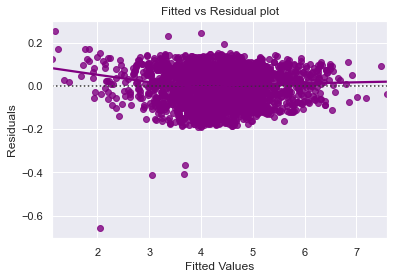

In [115]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observations:
* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

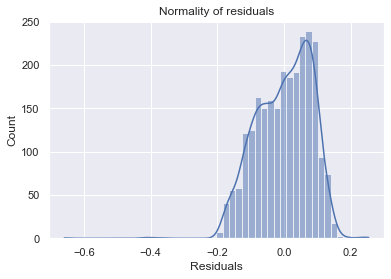

In [116]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

#### Observations:
- The histogram of residuals have an approximate shape of a bell.
- Let's check the Q-Q plot.

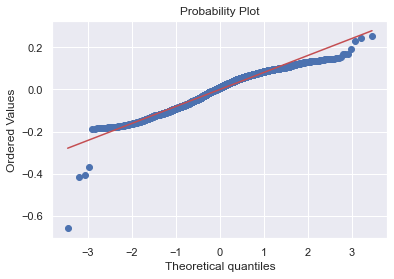

In [117]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [118]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9649659395217896, pvalue=3.552416177761628e-24)

#### Observations:
- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [119]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.0518720430356685), ('p-value', 0.18653840792817605)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [120]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
2098  3.450622   3.458192
278   5.281527   5.297606
26    5.754666   5.697975
2910  4.510530   4.473533
2631  4.251348   4.183939
1582  4.506233   4.651058
2110  6.070230   5.985111
3160  4.194793   4.117877
2817  4.760206   4.656976
549   3.696103   3.782893

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

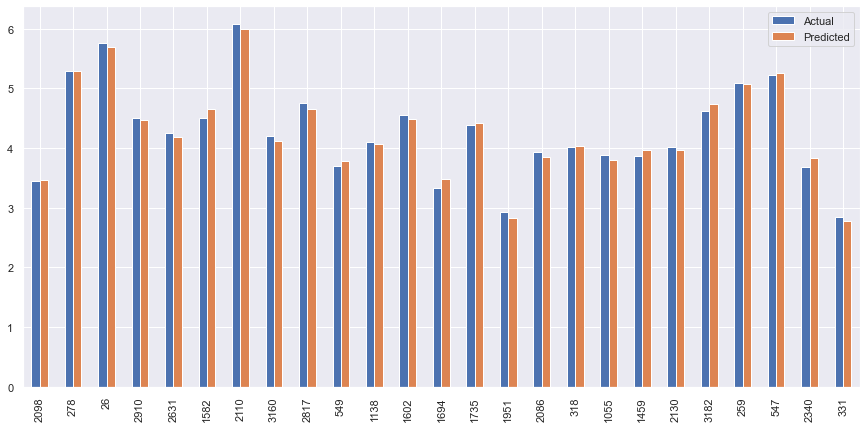

In [121]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [122]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train2, y_train)
olsmod2_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.08214  0.068326   0.990004        0.989972  1.670585

In [123]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



RMSE      MAE  R-squared  Adj. R-squared     MAPE
0  0.080509  0.06902   0.989899        0.989823  1.65104

* The model is able to explain ~99% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 1.65% of the used price. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [124]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Linear Regression sklearn  Linear Regression statsmodels
RMSE                             0.081557                       0.082140
MAE                              0.067535                       0.068326
R-squared                        0.990146                       0.990004
Adj. R-squared                   0.989953                       0.989972
MAPE                             1.650466                       1.670585

In [125]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Linear Regression sklearn  Linear Regression statsmodels
RMSE                             0.080874                       0.080509
MAE                              0.069081                       0.069020
R-squared                        0.989808                       0.989899
Adj. R-squared                   0.989329                       0.989823
MAPE                             1.650876                       1.651040

* The performance of the two models is close to each other.

## Final Model Summary
**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [126]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.525e+04
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:11:21   Log-Likelihood:                 2699.9
No. Observations:                2499   AIC:                            -5384.
Df Residuals:                    2491   BIC:                            -5337.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.4480      2.85

## Conclusion:
* Linear regression model was used to predict the future price of a used phone from the given data.
* The model is showing 99% accuracy in predicting the used phone prices.
* The comparison between the predicted price and actual price also shows that the two are on average quite close.
* This method of predicting the used phone prices will be very helpful for the company to predict the future prices of used phones.

* Phones with a higher newer price will be getting a higher used price in the market.
* The longer the phone has been used the lower the used price.
* These are some of the characteristics that contribute to used price: 'selfie_camera_mp', 'release_year', 'days_used', 'new_price_log', '4g' and '5g']

## Actionable Insights and Recommendations

- Higher the new price, higher will be the used price. The company could latch on to offers that come for new phones and then sell them as used phones for higher prices.
- A good selfie camera in a phone can fetch a good used price.
- If a used phone has only been in the hands of the customer for lesser number of days, the company can sell it for good resale value.
- Phone prices are varying within the data. However, we could state with certainty that phones with a price range of 80 to 120 euros sell in higher numbers. The higher the sales the better would be the profit.
- Android phones are dominating the market as seen in the data. The company could invest more in these to get more profit by selling more of Android phones. However, an Apple or Google phone, even though they are not selling in higher numbers, as their value is high in the market, they could also bring in more profit for each phone sold.
- A good RAM can fetch good sale price for phones. This can be seen from the moderate correlation between the used and new price of phone against RAM.
- Other features that could contribute to the price of a used phone would be the battery capacity, selfie camera resolution, screen size among others. Investing properly in each segment could improve the business as the company would be able to provide customers with enough options.